## <font color = "blue">Q1. Import the necessary libraries (2.5 marks) </font>

## <font color="green">Answer 1:</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stat
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, binarize

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc, make_scorer

from os import system

## <font color = "blue">Q2. Read the data as a data frame (2.5 marks) </font>

## <font color="green">Answer 2:</font>

<font color = "purple">
    We fetch the data and store it in a data frame. Also, we store the attribute description and the dataset itself into an HDF Store and retrieve it, so we may be able to get the column description as needed
   </font>

In [2]:
bank_df = pd.read_csv("bank-full.csv")
bank_df.col_description = {
    "age": "numeric",
    "job": "type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",
    "marital": "marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",
    "education": "(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",
    "default": "has credit in default? (categorical: 'no','yes','unknown')",
    "balance": "average yearly balance, in euros (numeric)",
    "housing": "has housing loan? (categorical: 'no','yes','unknown')",
    "loan": "has personal loan? (categorical: 'no','yes','unknown')",
    "contact": "contact communication type (categorical: 'cellular','telephone')",
    "day": "last contact day of the month (numeric 1 -31)",
    "month": "last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')",
    "duration": "last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.",
    "campaign": "number of contacts performed during this campaign and for this client (numeric, includes last contact)",
    "pdays": "number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)",
    "previous": "number of contacts performed before this campaign and for this client (numeric)",
    "poutcome": "outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')",
    "target":"has the client subscribed a term deposit? (binary: yes,no)"
}
with pd.HDFStore("Bank data.h5") as bank_store:
    bank_store.put("df", bank_df)
    bank_store.get_storer("df").attrs.col_description = bank_df.col_description
with pd.HDFStore("Bank data.h5") as bank_store:
    bank_df = bank_store.get("df")
    bank_df.col_description = bank_store.get_storer("df").attrs.col_description
bank_df.head()

C:\Users\abhijit.a.pande\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\abhijit.a.pande\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<font color = "magenta"> List the descriptions stored for the column</font>

In [3]:
bank_df.col_description

{'age': 'numeric',
 'job': "type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",
 'marital': "marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",
 'education': "(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",
 'default': "has credit in default? (categorical: 'no','yes','unknown')",
 'balance': 'average yearly balance, in euros (numeric)',
 'housing': "has housing loan? (categorical: 'no','yes','unknown')",
 'loan': "has personal loan? (categorical: 'no','yes','unknown')",
 'contact': "contact communication type (categorical: 'cellular','telephone')",
 'day': 'last contact day of the month (numeric 1 -31)',
 'month': "last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')",
 'duration': "last contac

## <font color = "blue">Q3. Perform basic EDA which should include the following and print out your insights at every step. (15 marks)</font>

## <font color="green">Answer 3:</font>

We perform two levels of EDA. The first is the broad based univariate and bivariate analysis to display the overall trends and the second answers the individual sub sections under this question

<font color = "magenta"> Describe the columns </font>

In [4]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### OBSERVATIONS
<font color = "purple">
    
From the looks of the data set, we see
1. Age: Ranges look appropriate, there seem to be no outliers and the minimum is the banking age (18)
2. Balance: Despite some large balances, the overall range looks appropriate. Balances may be large as some depositors to tend to have more money than others
3. Day: Days are in the expected range
4. Duration: Duration seems to have an abnormally high maximum (nearly 5000 seconds, which would mean there were conversations for almost 80 minutes). These may be outliers. However, the column needs to be dropped as most calls have an outcome available at the end. So this doesnt add any value to the predictive model (for the reason, we dont know the duration before we talk)
5. Campaign: The number of contacts performed also look fine, however 63 seems to be a large number of contacts on the maximum side and we may want to investigate it.
6. Pdays: The number of days passed from a previous contact look correct, and in terms of ordering it seems there is no 999 as suggested by the problem statement. We will have to assume that the -1 stands for no contact. This will need to be changed to 999 as an increase in Pdays means less likeliness to have target "yes". Overall this looks correct as well.
7. Previous: The number of contacts performed overall also look fine, however 275 again seems to be a large number of contacts on the maximum side and we may want to investigate it.
</font>

<font color = "magenta"> Listing the info of the dataset </font>

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


### OBSERVATIONS

<font color = "purple">
    The data is consistent and does not have nulls that need to be addressed
    </font>

<font color = "magenta"> Run through the columns to view unique values and see if there is any column that may need to be dropped due to a very large set of values </font>

In [6]:
for i in bank_df.columns: 
    print( i , ":" , bank_df[i].nunique())

age : 77
job : 12
marital : 3
education : 4
default : 2
balance : 7168
housing : 2
loan : 2
contact : 3
day : 31
month : 12
duration : 1573
campaign : 48
pdays : 559
previous : 41
poutcome : 4
Target : 2


### OBSERVATIONS

<font color = "purple">
    The number of distinct values in each of the columns also look appropriate. What seems to be a question is whether we should consider the "day", "month" features. Do the contact day/month hold any influence in determining the yes/no outcome of a contact
    </font>

<font color = "magenta"> Plotting a histogram for numerical values within the data frame</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C652BA160>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

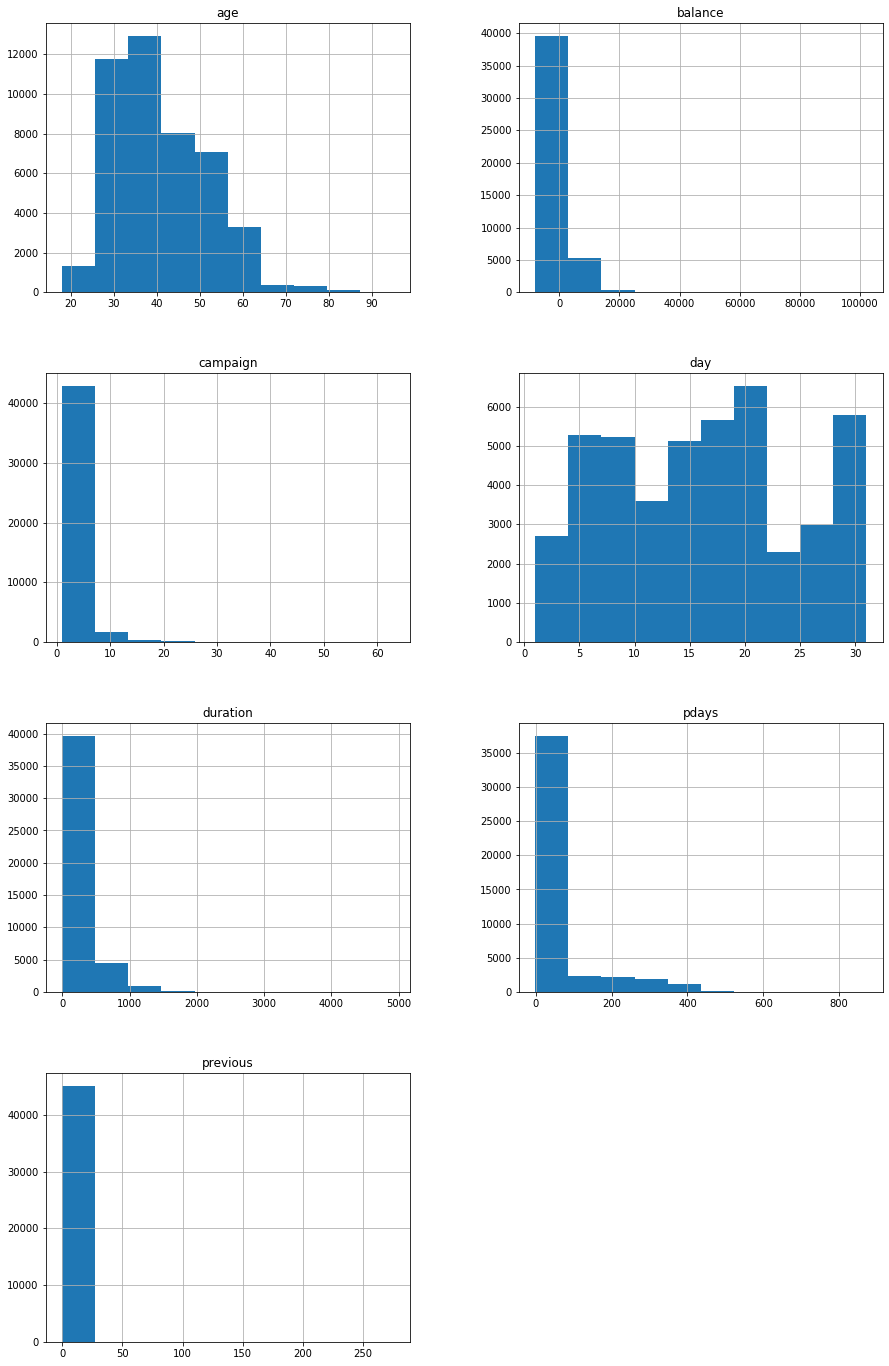

In [7]:
plt.figure(figsize = (10,10))
bank_df.drop("Target", axis = 1).hist(stacked = False, figsize = (15,50), layout = (8,2))

### OBSERVATIONS

<font color = "purple">
    Most of the distributions seem to be right skewed, except day. This makes sense as the contacts should generally be evenly distributed across a month. </font>

<font color = "magenta"> Viewing the data before plotting it </font>

In [8]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<font color = "magenta"> Converting the target variable into 0s and 1s </font>

In [9]:
bank_df = bank_df.replace({"Target": {"yes":1, "no":0}})

## <font color = "magenta"> Univariate Analysis Begins </font>

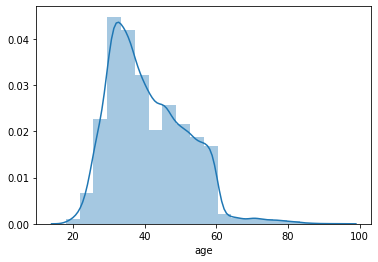

In [10]:
sns.distplot(bank_df["age"],bins = 20)

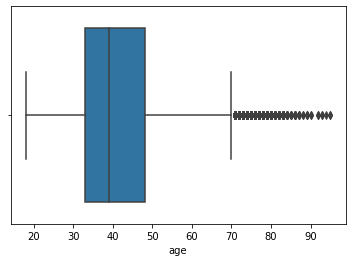

In [11]:
sns.boxplot(bank_df["age"])

### OBSERVATIONS

<font color = "purple"> as described previously, age seems to have outliers towards the right. The median age is around 39 </font>

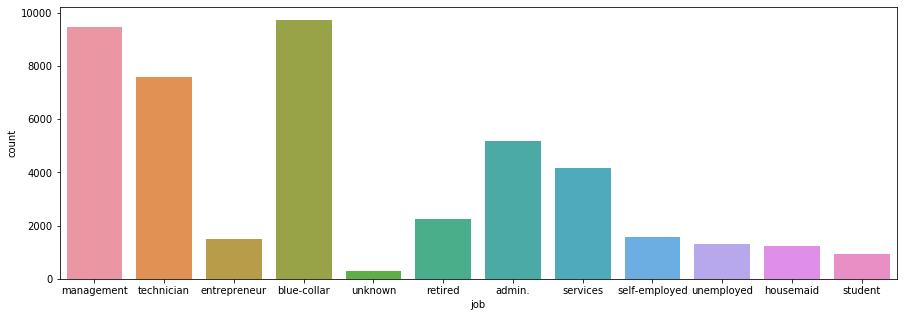

In [12]:
plt.figure(figsize = (15,5))
sns.countplot(x = "job", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Most of the jobs are management, technician and blue-collar. The least represented groups are students</font>

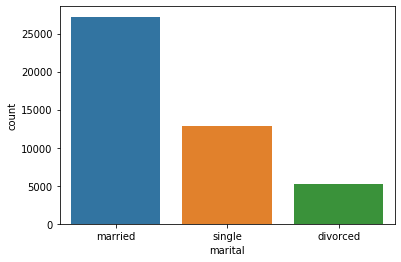

In [13]:
sns.countplot(x = "marital", data = bank_df)

In [14]:
print("Divorced:", bank_df[bank_df["marital"] == "divorced"]["marital"].count() / bank_df["marital"].count())
print("Single:",bank_df[bank_df["marital"] == "single"]["marital"].count() / bank_df["marital"].count())
print("Married:",bank_df[bank_df["marital"] == "married"]["marital"].count() / bank_df["marital"].count())

Divorced: 0.11517108668244454
Single: 0.2828957554577426
Married: 0.6019331578598128


### OBSERVATIONS

<font color = "purple"> Married people make up more than half the population, divorced around 11% and single people approximately over 28% </font>

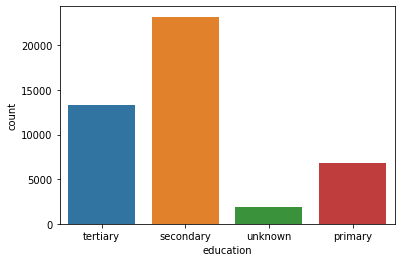

In [15]:
sns.countplot(x = "education", data = bank_df)

In [16]:
print("Primary:", bank_df[bank_df["education"] == "primary"]["education"].count() / bank_df["education"].count())
print("Secondary:",bank_df[bank_df["education"] == "secondary"]["education"].count() / bank_df["education"].count())
print("Tertiary:",bank_df[bank_df["education"] == "tertiary"]["education"].count() / bank_df["education"].count())

Primary: 0.15153391873659064
Secondary: 0.513193691800668
Tertiary: 0.29419831456946316


### OBSERVATIONS

<font color = "purple"> primary educated people are the smallest group(15%), over half the people are secondary educated, 29% people have tertiary educations. There is also a small group of unknowns </font>

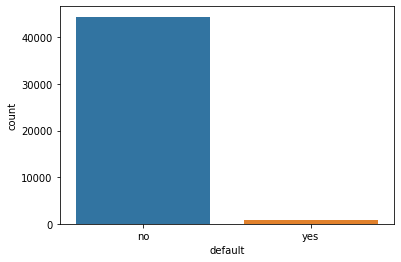

In [17]:
sns.countplot(x = "default", data = bank_df)

In [18]:
print("Yes:", bank_df[bank_df["default"] == "yes"]["default"].count() / bank_df["default"].count())
print("No:",bank_df[bank_df["default"] == "no"]["default"].count() / bank_df["default"].count())

Yes: 0.018026586450200173
No: 0.9819734135497998


### OBSERVATIONS

<font color = "purple"> Just under 2% of people defaulted </font>

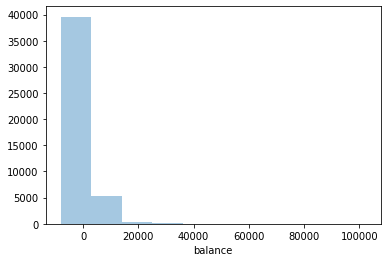

In [19]:
sns.distplot(bank_df["balance"], bins = 10, kde = False)

### OBSERVATIONS

<font color = "purple"> Bulk of the account balances lie under 30000 </font>

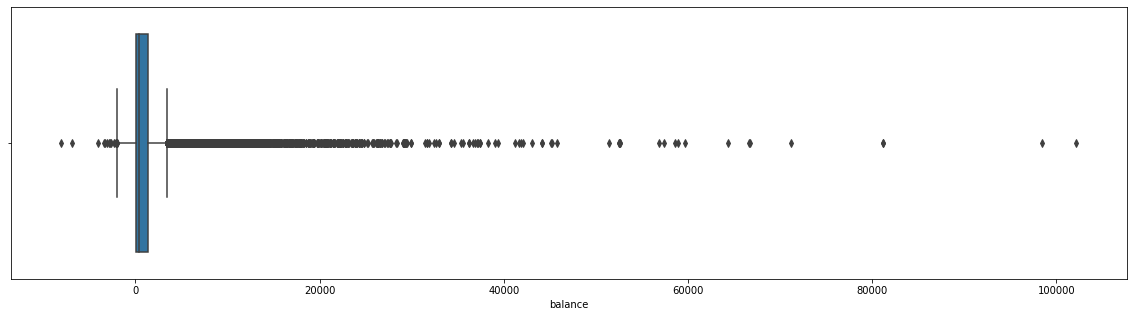

In [20]:
plt.figure(figsize = (20,5))
sns.boxplot(bank_df["balance"])

### OBSERVATIONS

<font color = "purple"> There is a large number of outliers in the balance column, however there are very few outside 50000 and can be eliminated if needed</font>

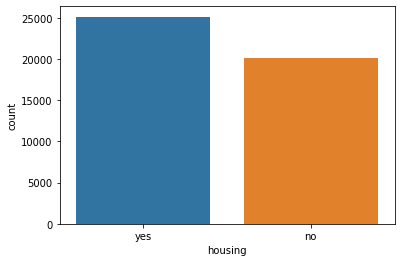

In [21]:
sns.countplot(x = "housing", data = bank_df)

In [22]:
print("Yes:", bank_df[bank_df["housing"] == "yes"]["housing"].count() / bank_df["housing"].count())
print("No:",bank_df[bank_df["housing"] == "no"]["housing"].count() / bank_df["housing"].count())

Yes: 0.5558381809736569
No: 0.44416181902634316


### OBSERVATIONS

<font color = "purple"> 55% of people in the dataset have housing loans </font>

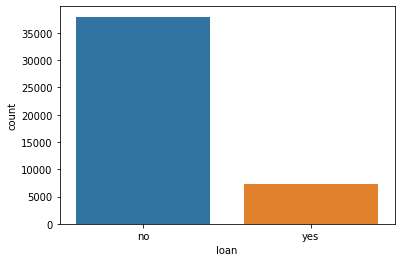

In [23]:
sns.countplot(x = "loan", data = bank_df)

In [24]:
print("Yes:", bank_df[bank_df["loan"] == "yes"]["loan"].count() / bank_df["loan"].count())
print("No:",bank_df[bank_df["loan"] == "no"]["loan"].count() / bank_df["loan"].count())

Yes: 0.16022649355245405
No: 0.839773506447546


### OBSERVATIONS

<font color = "purple"> Around 16% of the people are personal loan customers </font>

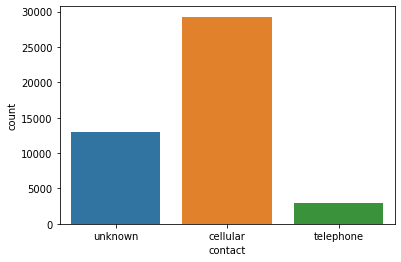

In [25]:
sns.countplot(x = "contact", data = bank_df)

In [26]:
print("Cellular:", bank_df[bank_df["contact"] == "cellular"]["contact"].count() / bank_df["contact"].count())
print("Telephone:",bank_df[bank_df["contact"] == "telephone"]["contact"].count() / bank_df["contact"].count())

Cellular: 0.647740594103205
Telephone: 0.06427639291322908


### OBSERVATIONS

<font color = "purple"> 6% people use telephone, around 65% use cellular, there is a considerable number of unknowns and they will have to be treated</font>

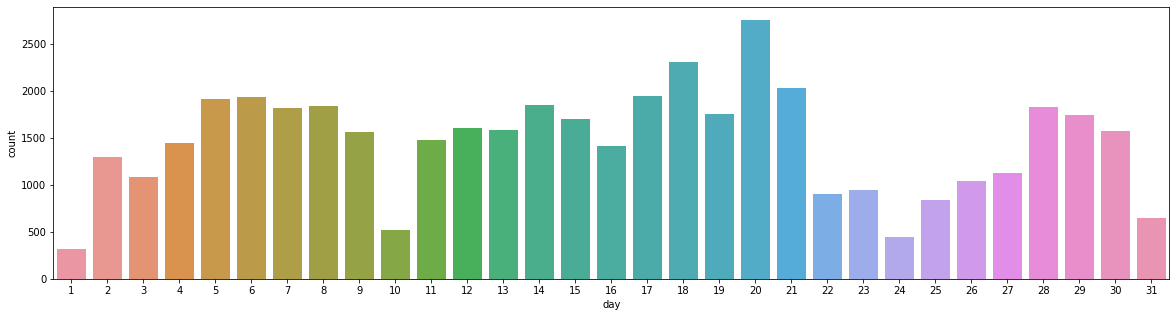

In [27]:
plt.figure(figsize = (20,5))
sns.countplot(x = "day", data = bank_df)

### OBSERVATIONS

<font color = "purple"> There does not seem to be a clear pattern in the contacts on different days. The data seems to have a normal distribution overall if put together  </font>

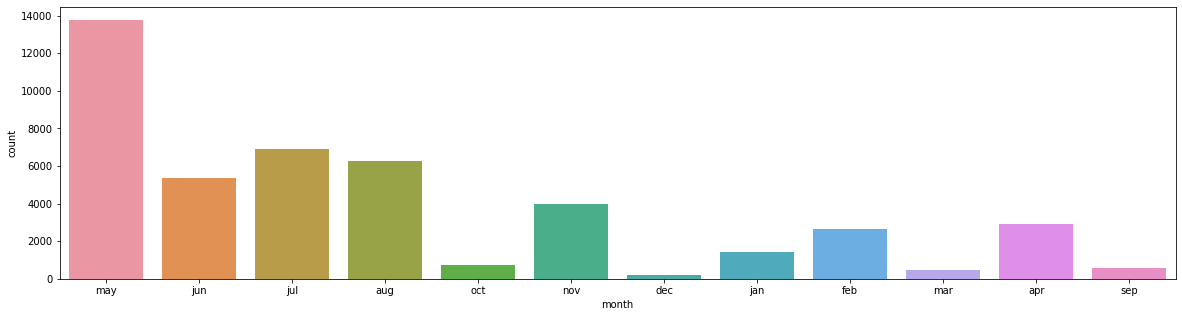

In [28]:
plt.figure(figsize = (20,5))
sns.countplot(x = "month", data = bank_df)

### OBSERVATIONS

<font color = "purple"> There seems to be a large number of contacts starting in the new financial year for around 5 months. April, may, june, july, august seem to have the highest activity. </font>

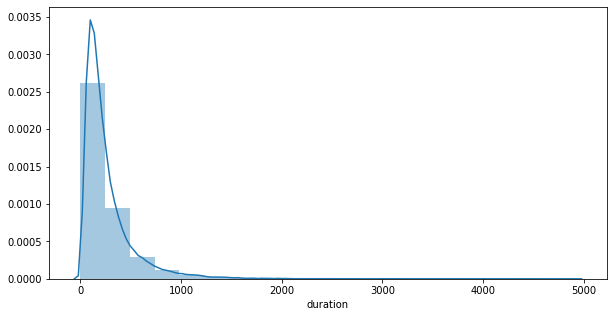

In [29]:
plt.figure(figsize = (10,5))
sns.distplot(bank_df["duration"], bins = 20)

In [30]:
bank_df[bank_df["duration"]>900]["duration"].count()/bank_df["duration"].count()

0.031364048572250114

### OBSERVATIONS

<font color = "purple"> Duration is strongly right tailed, there are a small percentage(~3%) of calls that last over 15 minutes. </font>

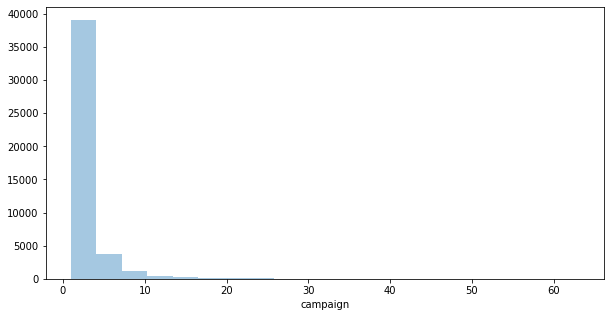

In [31]:
plt.figure(figsize = (10,5))
sns.distplot(bank_df["campaign"], bins = 20 , kde = False)

In [32]:
bank_df[bank_df["campaign"]>10]["campaign"].count()/bank_df["campaign"].count()

0.02645373913428148

### OBSERVATIONS

<font color = "purple"> Around 2.6% of the values are > 10 contacts in the campaign </font>

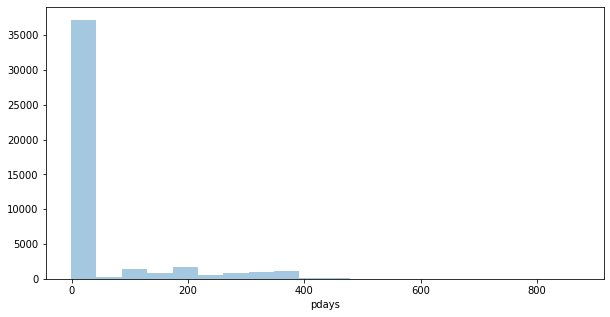

In [33]:
plt.figure(figsize = (10,5))
sns.distplot(bank_df["pdays"], bins = 20 , kde = False)

In [34]:
bank_df[bank_df["pdays"]>100]["pdays"].count()/bank_df["pdays"].count()

0.1508482448961536

### OBSERVATIONS

<font color = "purple"> Most Pday occurences are -1, however, there is a considerable chunk where Pday occurences are larger and in the hundreds (15%) </font>

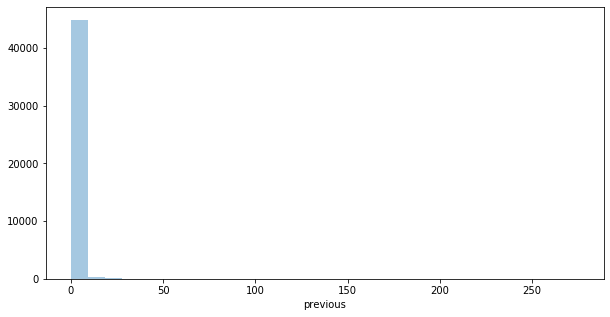

In [35]:
plt.figure(figsize = (10,5))
sns.distplot(bank_df["previous"], bins = 30 , kde = False)

In [36]:
print(bank_df[bank_df["previous"]>100]["previous"].count()/bank_df["previous"].count())

2.2118510981840703e-05


### OBSERVATIONS

<font color = "purple"> There is a very small percentage of rows with previous > 100, (just 1 row) these are clearly outliers. We can remove them in the data cleaning steps </font>

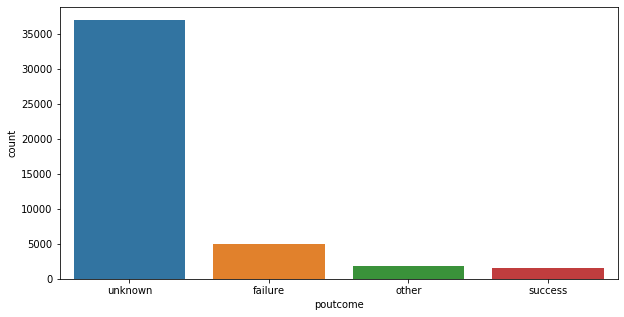

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(x = "poutcome", data = bank_df)

In [38]:
print("Unknown:", bank_df[bank_df["poutcome"] == "unknown"]["poutcome"].count() / bank_df["poutcome"].count())
print("Other:", bank_df[bank_df["poutcome"] == "other"]["poutcome"].count() / bank_df["poutcome"].count())
print("Failure:",bank_df[bank_df["poutcome"] == "failure"]["poutcome"].count() / bank_df["poutcome"].count())
print("Success:",bank_df[bank_df["poutcome"] == "success"]["poutcome"].count() / bank_df["poutcome"].count())

Unknown: 0.8174780473778506
Other: 0.040698060206586895
Failure: 0.10840282232200128
Success: 0.0334210700935613


### OBSERVATIONS

<font color = "purple"> This column seems to have only 3% values for success. If this is not strongly relevant to the target column, this column should be dropped. 

EDIT: During the analysis, it turns out the success cases in this column are highly relevant to target "Yes". We will try to find a way to treat this column

</font>

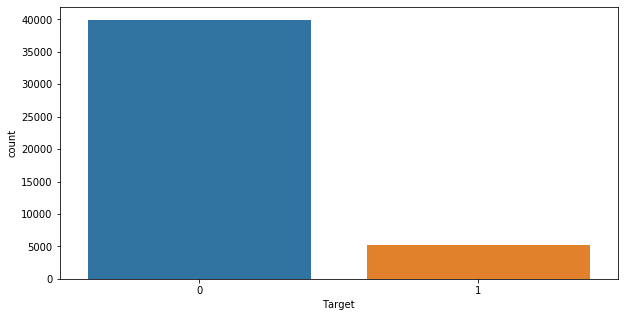

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(x = "Target", data = bank_df)

In [40]:
print("Yes:", bank_df[bank_df["Target"] == 1]["Target"].count() / bank_df["Target"].count())
print("No:", bank_df[bank_df["Target"] == 0]["Target"].count() / bank_df["Target"].count())

Yes: 0.11698480458295547
No: 0.8830151954170445


### OBSERVATIONS

<font color = "purple"> The target column has a low number of Yes values (11%) and will need to be balanced during model development </font>

In [41]:
bank_df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0


In [42]:
bank_df["Target"].unique()

array([0, 1], dtype=int64)

### OBSERVATIONS

<font color = "purple"> The target column does not have any issues </font>

<font color = "magenta"> Displaying the dataset rows for further Bivariate analysis..</font>

In [43]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


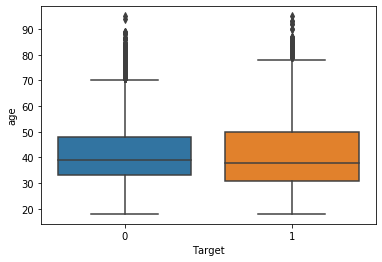

In [44]:
sns.boxplot(x = "Target", y = "age", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Age seems to have a very low effect on the target outcome. The median is similar for both 0 and 1 outcomes </font>

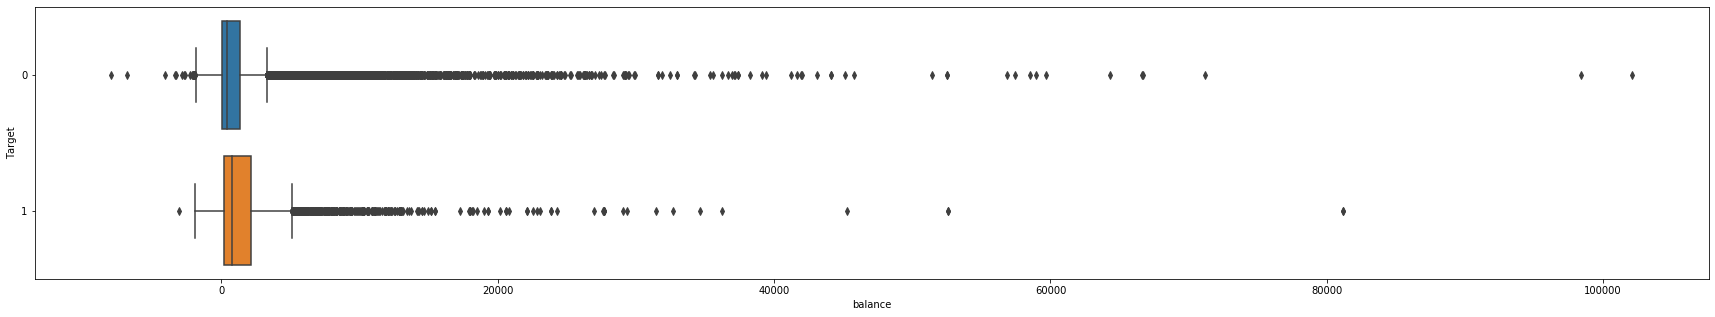

In [45]:
plt.figure(figsize = (30,5))
sns.boxplot(x = "balance", y = "Target", orient = "h", data = bank_df)

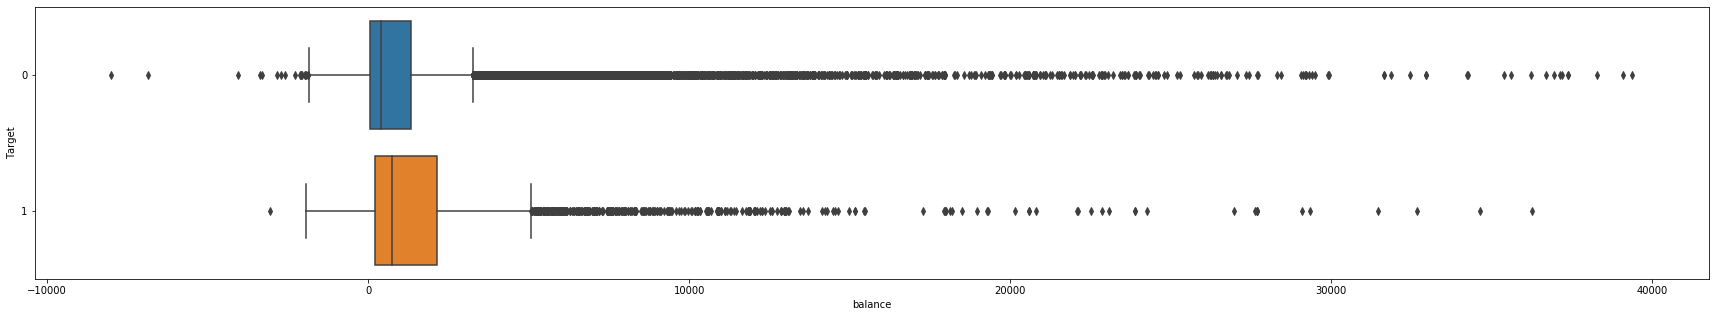

In [46]:
plt.figure(figsize = (30,5))
sns.boxplot(x = "balance", y = "Target", orient = "h", data = bank_df[bank_df["balance"]<40000])

### OBSERVATIONS

<font color = "purple"> people who make term deposits seem to have a higher median balance in their accounts </font>

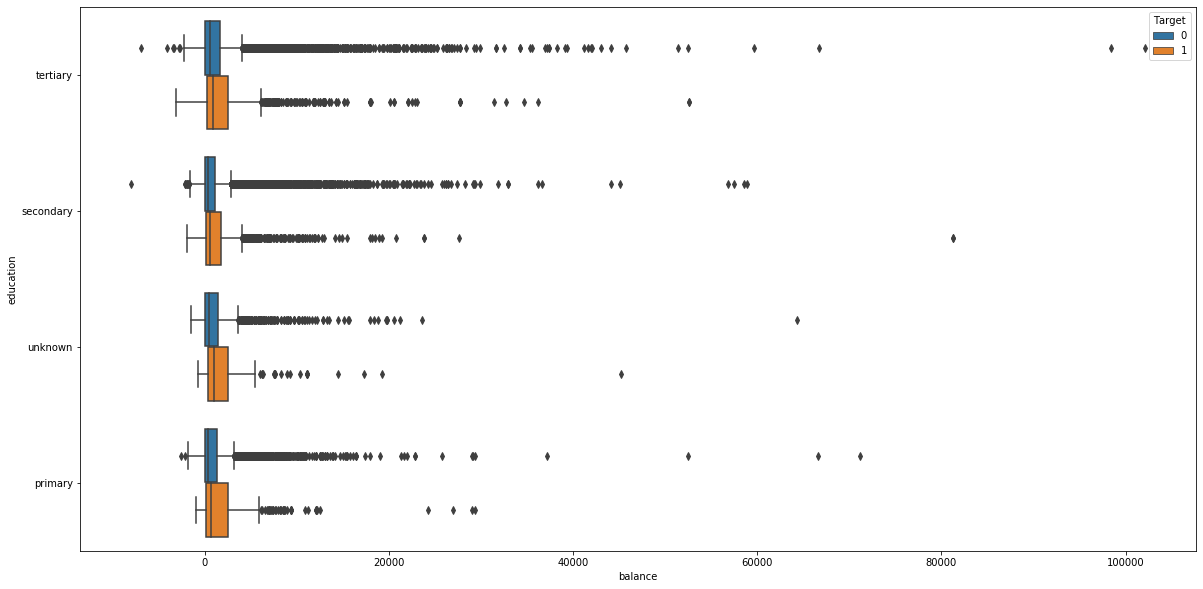

In [47]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "balance", y = "education", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People with secondary education that opt for term deposit have similar median balances to people who have secondary education but dont make term deposits. For all other groups the median account balance is higher if they opt for term deposits </font>

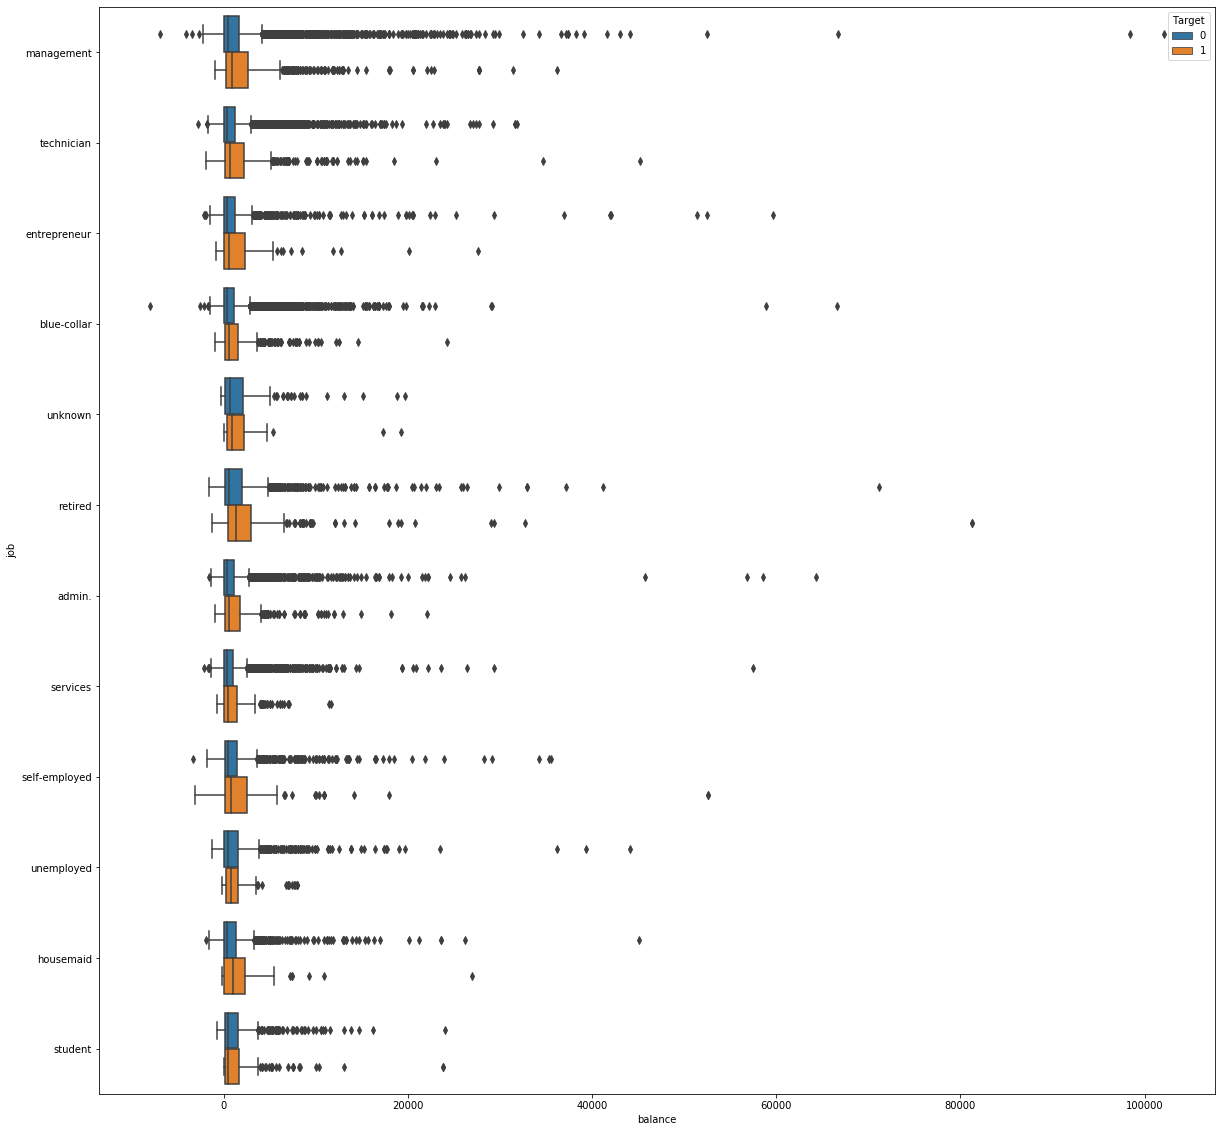

In [48]:
plt.figure(figsize = (20,20))
sns.boxplot(x = "balance", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People in admin, services and student roles who have term deposits/dont have term deposits have similar median account balances, for all other groups the median account balances are higher if the person chooses a term deposit</font>

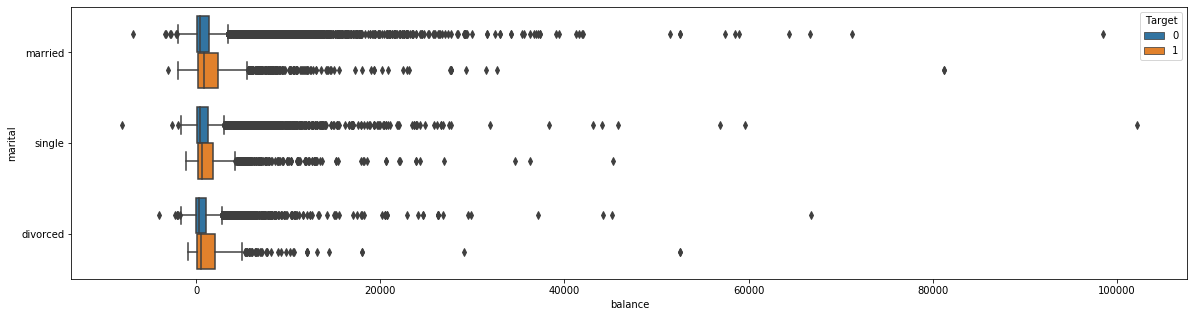

In [49]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "balance", y = "marital",hue = "Target", data = bank_df)

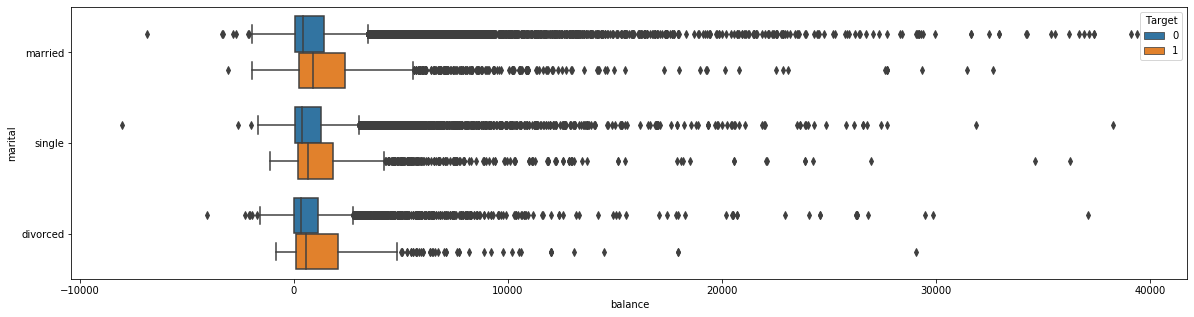

In [50]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "balance", y = "marital",hue = "Target", data = bank_df[bank_df["balance"]<40000])

### OBSERVATIONS

<font color = "purple"> Across all groups those who opt for term balances have higher median account balance. </font>

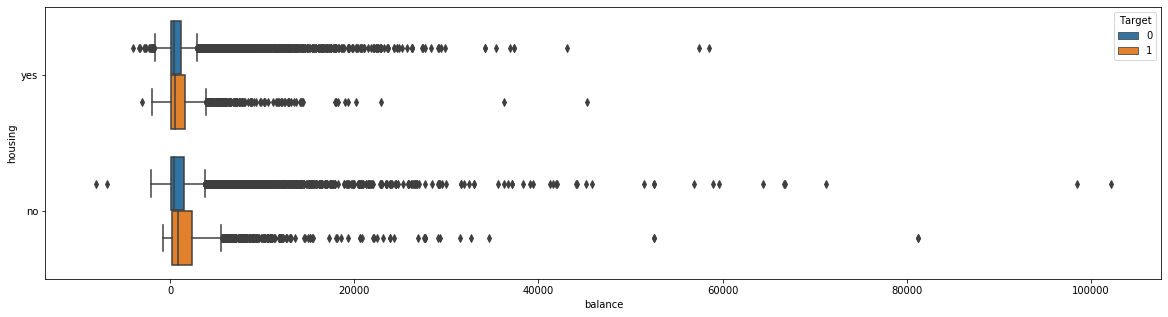

In [51]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "balance", y = "housing", hue = "Target",data = bank_df)

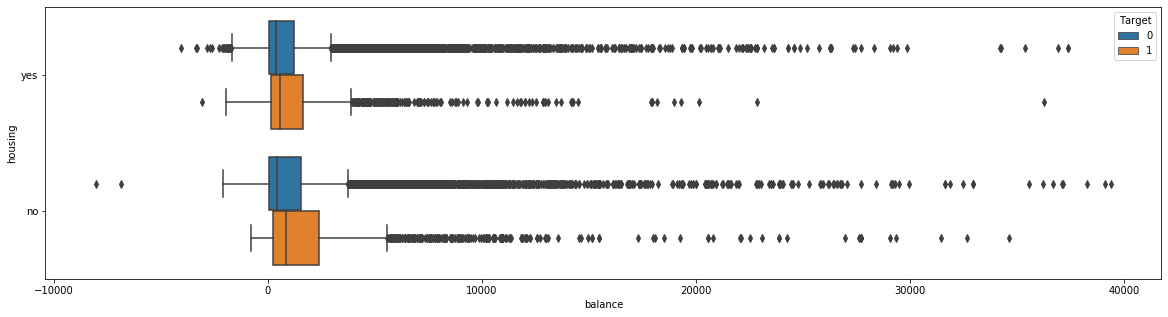

In [52]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "balance", y = "housing", hue = "Target",data = bank_df[bank_df["balance"]<40000])

### OBSERVATIONS

<font color = "purple"> Across both groups, people with term deposits have a higher median account balance. Also, those without a home loan have a higher balance than the people with home loans. </font>

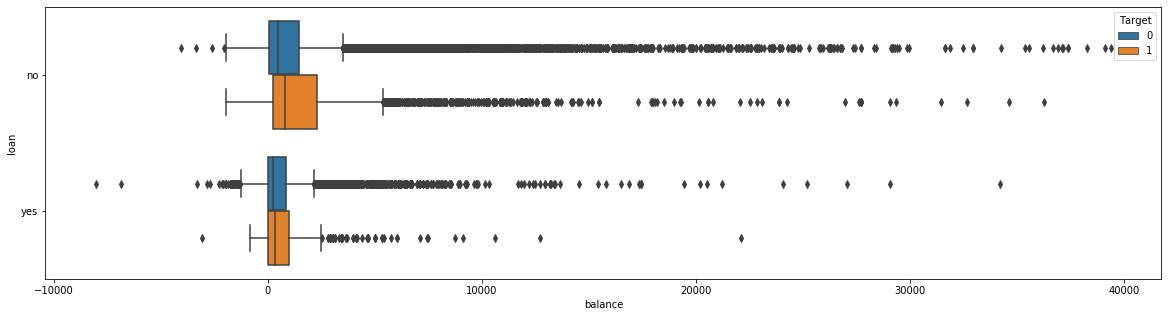

In [53]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "balance", y = "loan",hue = "Target", data = bank_df[bank_df["balance"]<40000]) 
## reducing the major outliers from visualization by using <40000 balance check

### OBSERVATIONS

<font color = "purple"> Regardless of whether a person has a personal loan or not, if he/she makes a term deposit, his median account balance would generally be higher than the people who dont. People without personal loans have a higher median account balance than those who do</font>

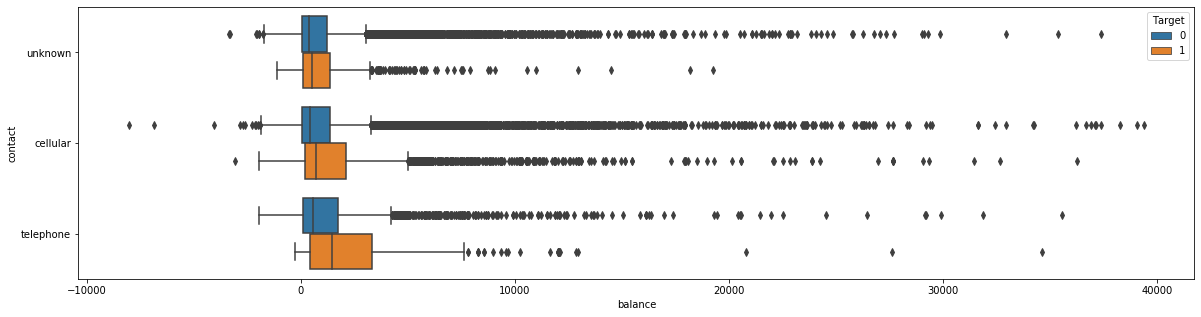

In [54]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "balance", y = "contact", hue = "Target", data = bank_df[bank_df["balance"]<40000])
## reducing the major outliers from visualization by using <40000 balance check

### OBSERVATIONS

<font color = "purple"> telephone holders have the highest median account balance in the categories and those that make a term deposit have a higher median balance than those who dont</font>

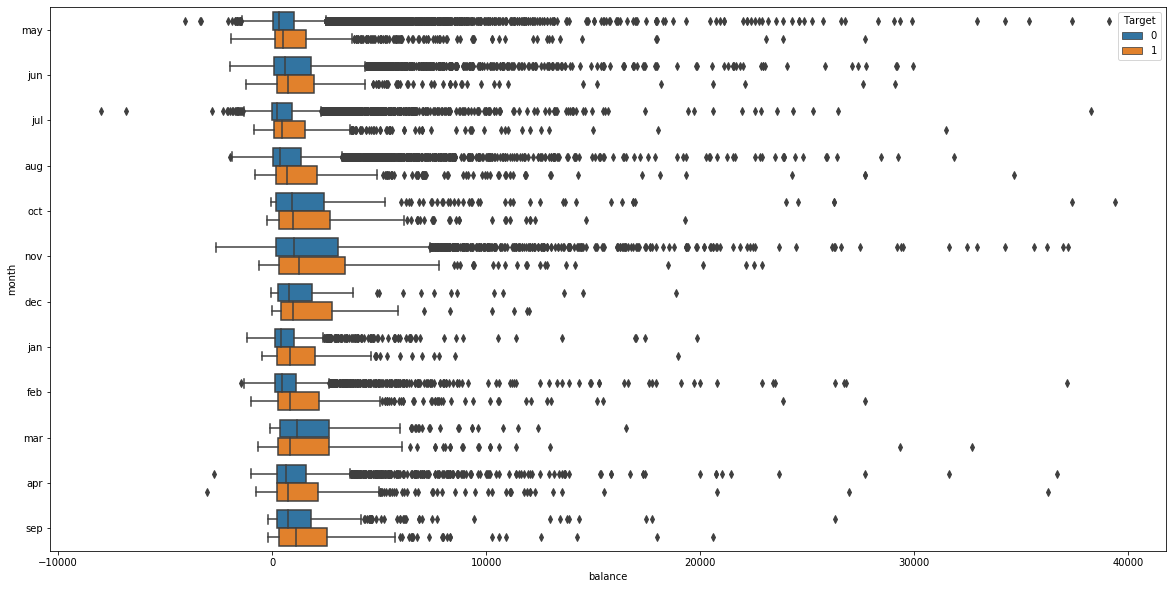

In [55]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "balance", y = "month", hue = "Target", data = bank_df[bank_df["balance"]<40000])

### OBSERVATIONS 

<font color = "purple"> The median balance is higher in almost all cases where the term deposit was yes. except the month of march. Put in perspective with the low number of contacts in may, this may mean that lower contacts in march lead to lower term deposits, and the outcome may be affected due to lower base</font>

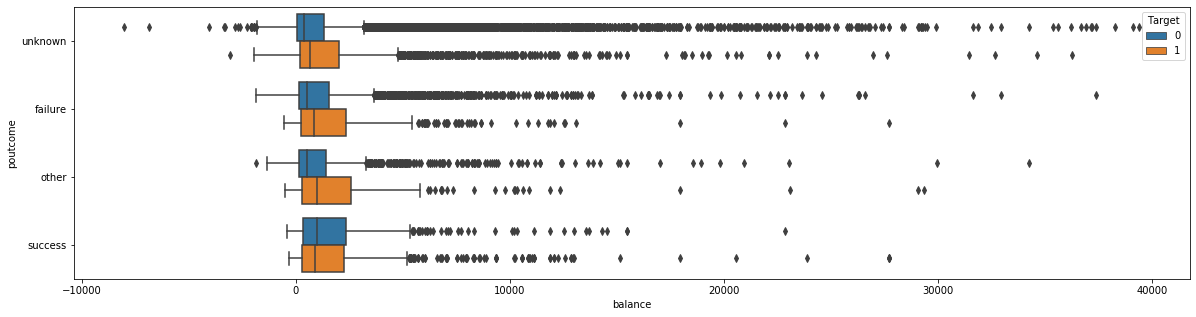

In [56]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = "balance", y = "poutcome", hue = "Target", data = bank_df[bank_df["balance"]<40000])
## reducing the major outliers from visualization by using <40000 balance check

### OBSERVATIONS

<font color = "purple"> The category "success" has a similar median balance for both term deposit yes and no. Success may not depend on account balance </font>

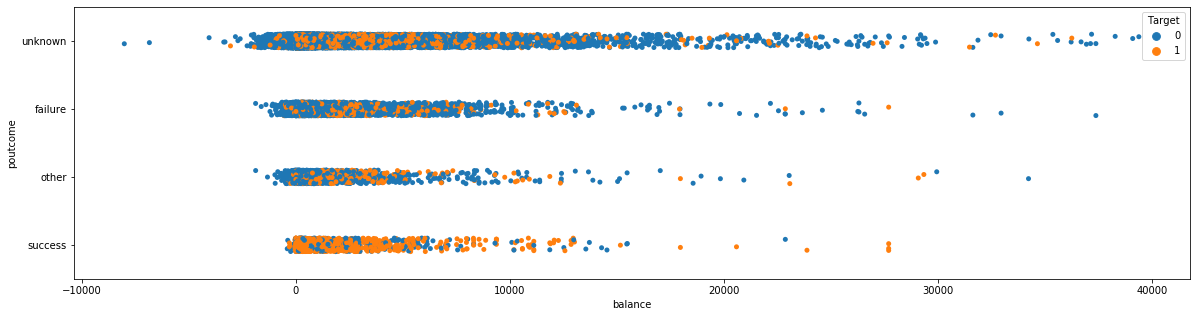

In [57]:
plt.figure(figsize = (20, 5))
sns.stripplot(x = "balance", y = "poutcome", hue = "Target", data = bank_df[bank_df["balance"]<40000], jitter = True)
## reducing the major outliers from visualization by using <40000 balance check

### OBSERVATIONS

<font color = "purple"> The strip plot confirms our previous observation. A lot of success category relates to "Target" yes and it does not necessarily need a large account balance </font>

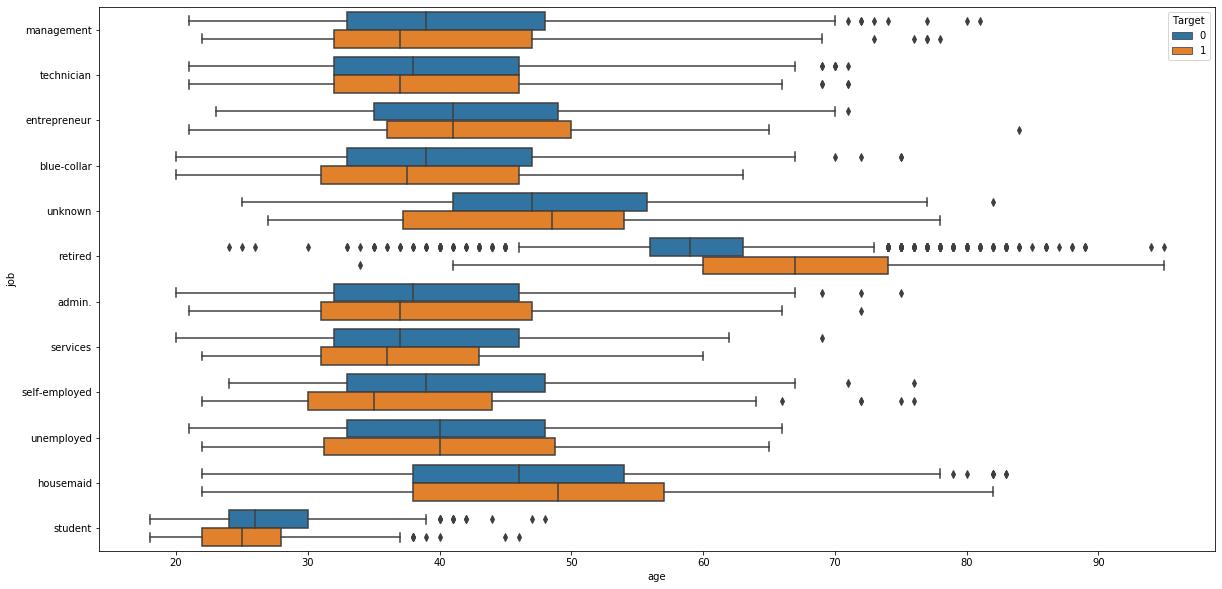

In [58]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "age", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Depending on employment, the median age differs for people who have made a term deposit and for those who havent. This should be useful for our machine learning models </font>

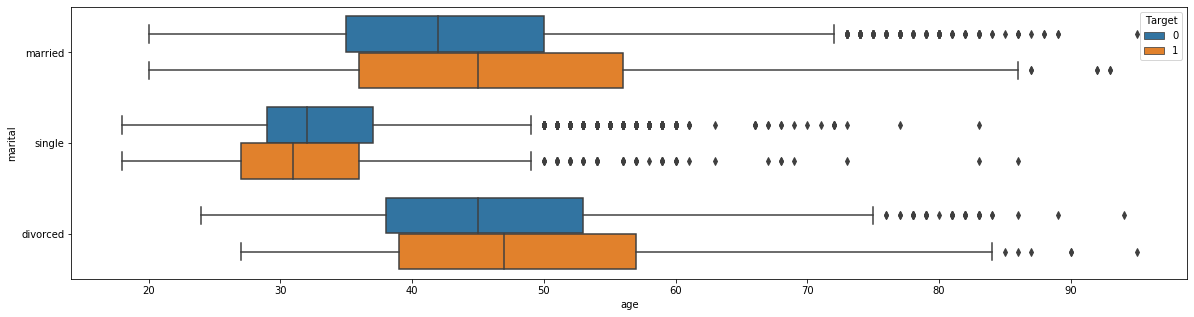

In [59]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "marital", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Single people make term deposits when they are younger, married and divorced people have a higher median age if they make term deposits</font>

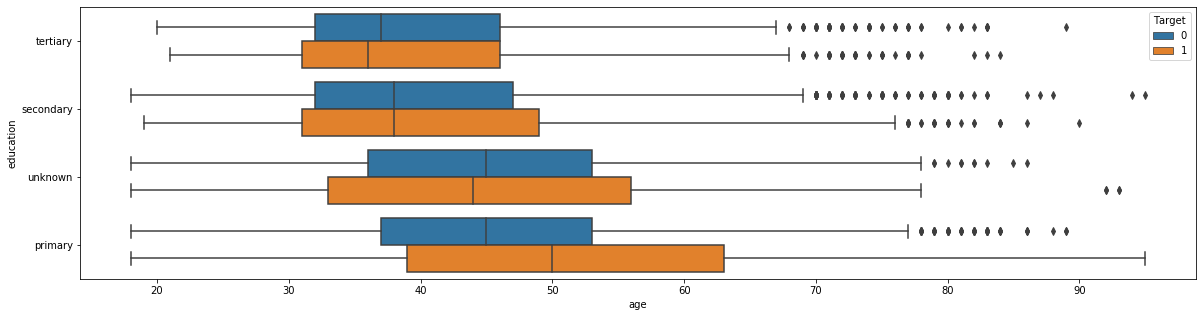

In [60]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "education", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> As education levels rise, the median age for making term deposits drops</font>

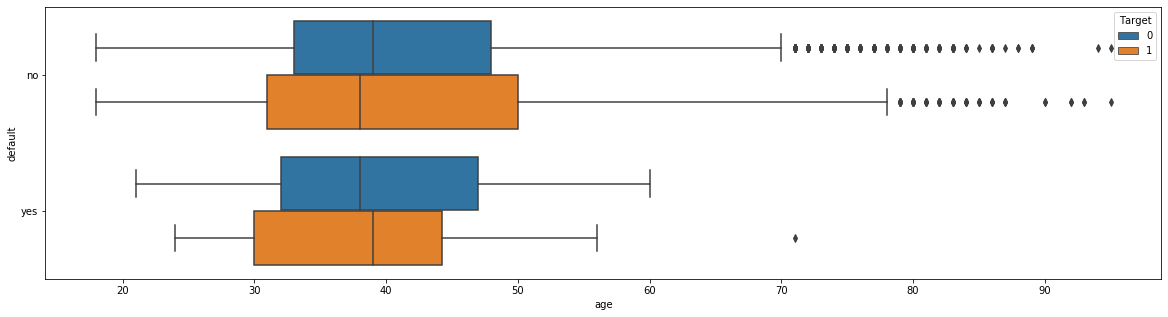

In [61]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "default", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> people who default, generally make term deposits at a higher median age. It is the other way around for people who have no defaults</font>

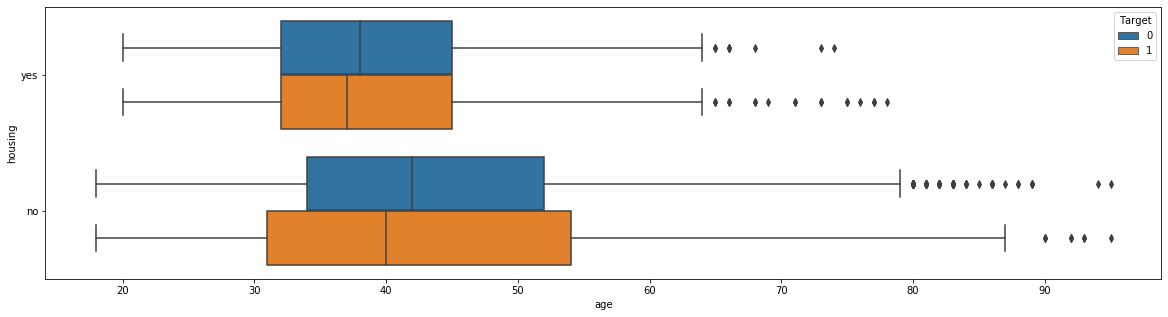

In [62]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "housing", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People have a lower median age for making deposits for housing loans "yes" and "no"</font>

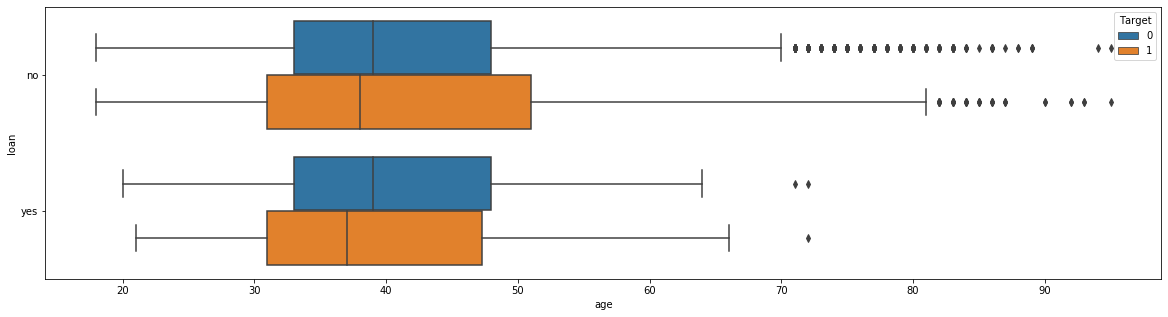

In [63]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "loan", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People have a lower median age for making deposits, for personal loans "yes" and "no"</font>

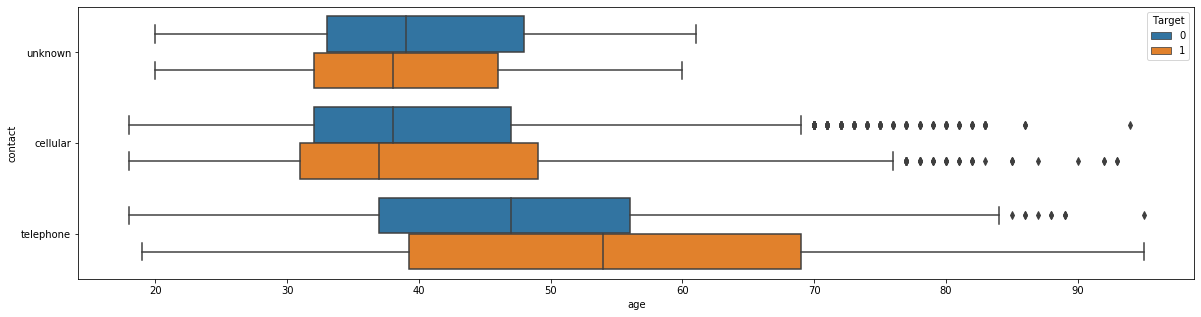

In [64]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "contact", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People with telephones who make deposits usually have a higher median age than others. For people who use cellulars, the median age for making deposits is lower</font>

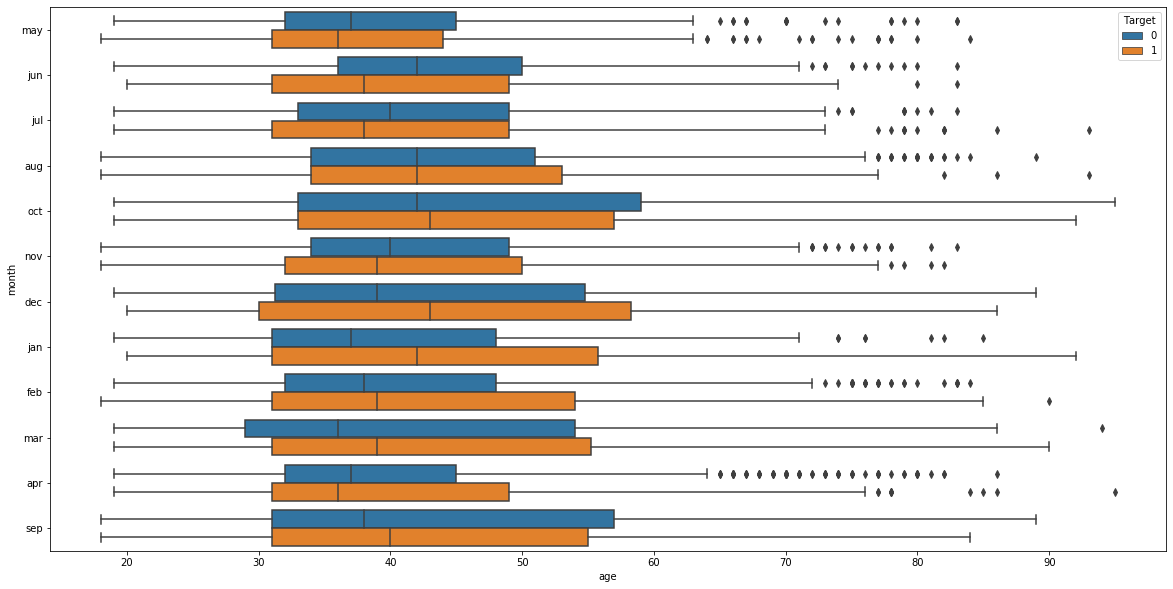

In [65]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "age", y = "month", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> when we look at this graph in correlation with the count plot of the contacts against months, we see that the months with lower contacts correspond to a higher median age of customers who make term deposits. For months with higher number of contacts, the median age of people who made term deposits is lower

There is a need to investigate this further. We will try a strip plot and success rate measurement for each month to see if there is a value in keeping the months around</font>

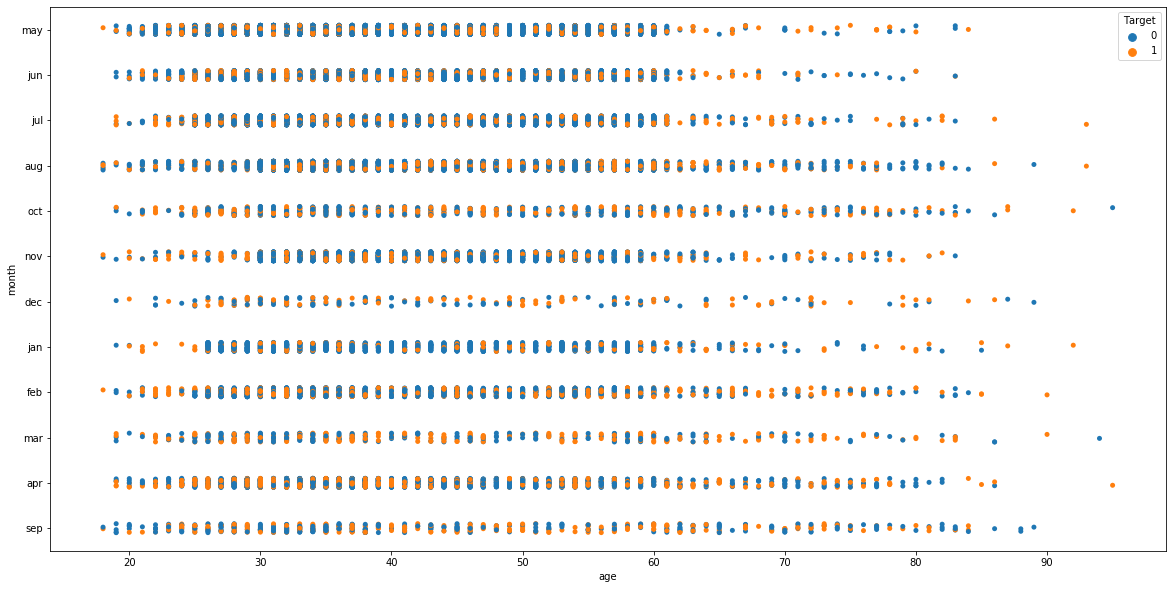

In [66]:
plt.figure(figsize = (20,10))
sns.stripplot(x = "age", y = "month", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> Though a little difficult to interpret, the graph indicates that a lot of target "yes" were contacted in february, march and april </font>

In [67]:
month_totals = bank_df["month"].value_counts()
month_success = bank_df[bank_df["Target"] == 1]["month"].value_counts()
monthly_series = (month_success/month_totals)*100
monthly_series

apr    19.679400
aug    11.013286
dec    46.728972
feb    16.647792
jan    10.121169
jul     9.093546
jun    10.222805
mar    51.991614
may     6.719454
nov    10.151134
oct    43.766938
sep    46.459413
Name: month, dtype: float64

### OBSERVATIONS

<font color = "purple"> This analysis makes it much clearer. Last contacts in months of low contact volume have  higher success rates than other months. Contact months of sept, oct, december and march correlate to a higher percentage of target "Yes. Thus we will retain the "month"</font>

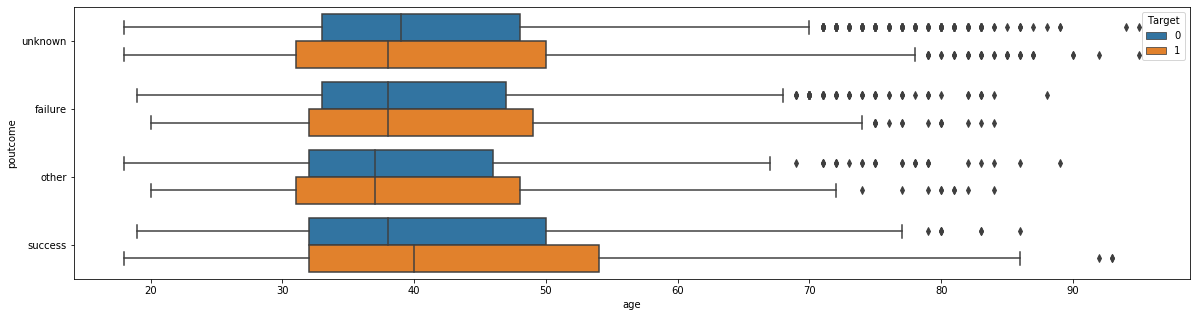

In [68]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "age", y = "poutcome", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> for poutcome "success", the median age for term deposits is higher. </font>

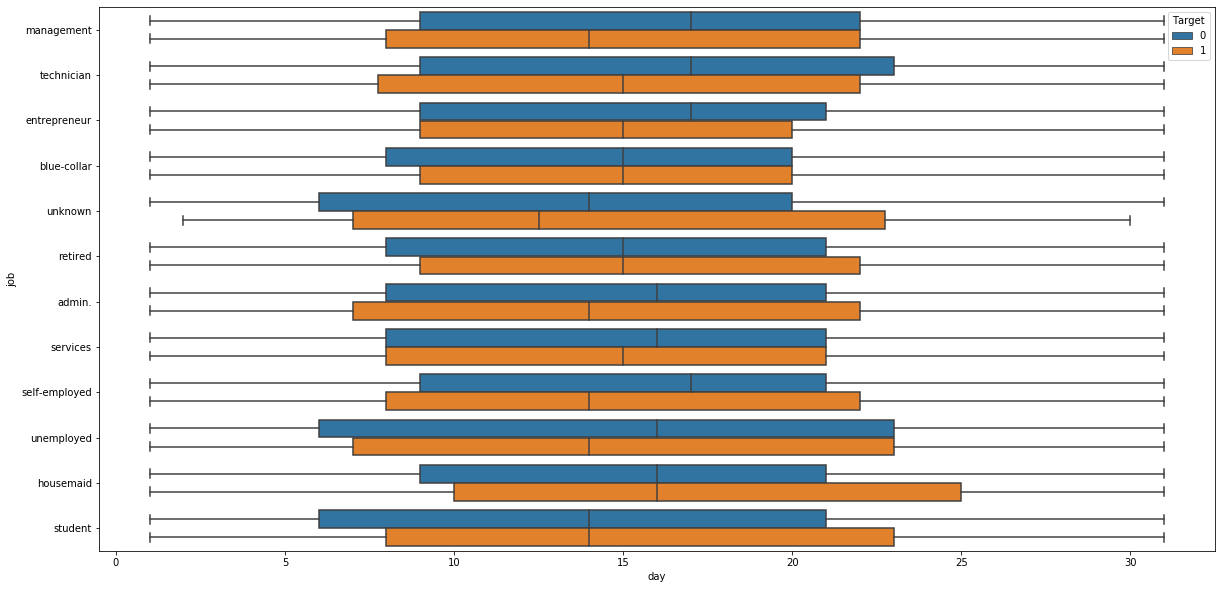

In [69]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "day", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Apart from housemaids, students, retired people, the median contact days for all other groups where term deposits were made, are less than the cases where term deposits were not made. </font>

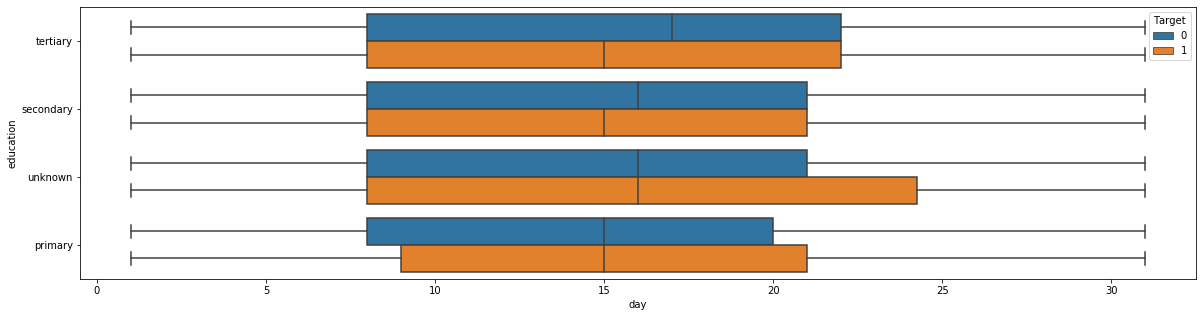

In [70]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "day", y = "education", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Higher educated groups have a lower contact day median than others. However, the median is 15 in many cases and seems to offer no predictive power </font>

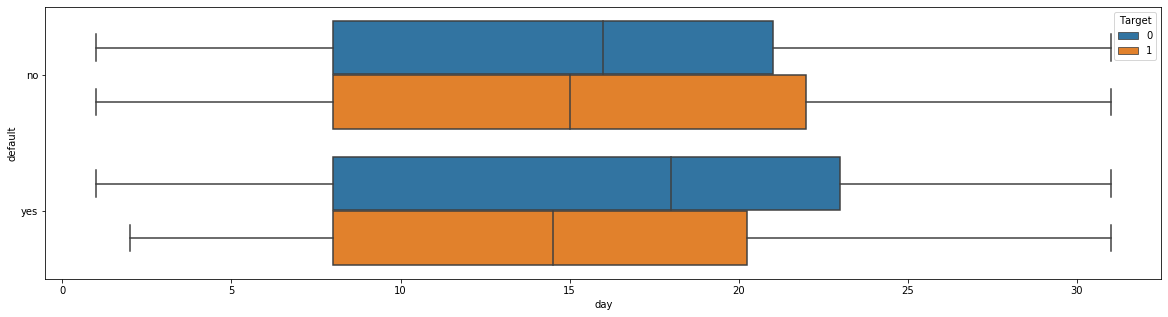

In [71]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "day", y = "default", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Median days for those who had term deposits is lower</font>

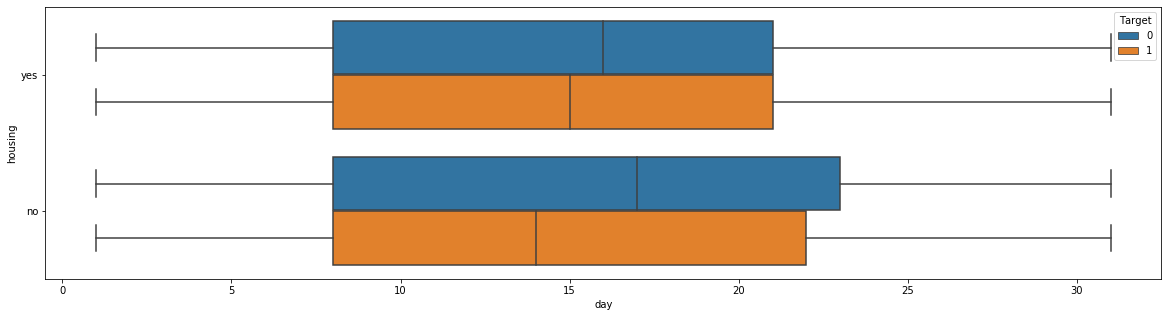

In [72]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "day", y = "housing", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Median days for those who had term deposits is lower, for both, housing loan yes and no </font>

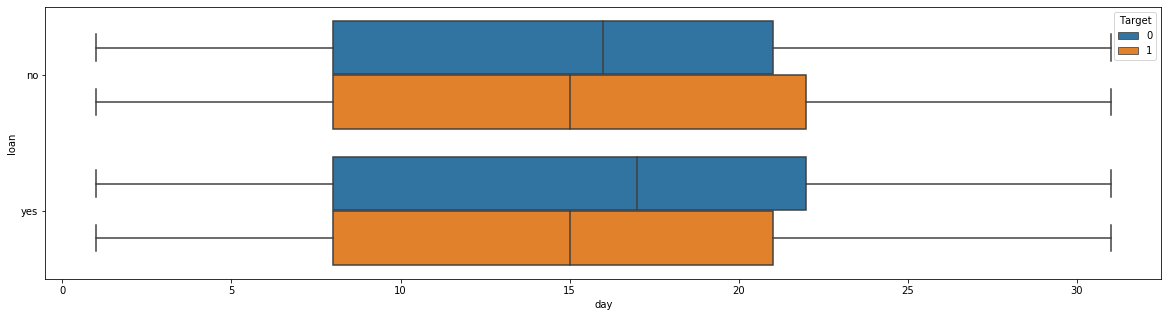

In [73]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "day", y = "loan", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Median days for those who had term deposits is lower, for both, personal loan yes and no </font>

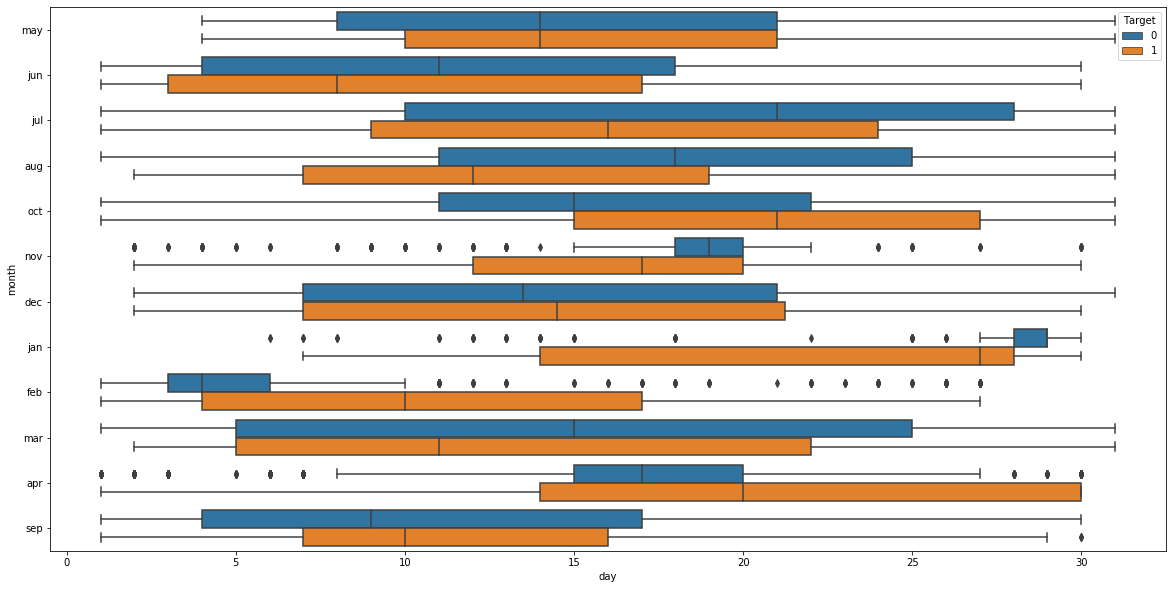

In [74]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "day", y = "month", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> No clear inferrences from this graph. Although it may relate to the countplot of contacts in a month
</font>

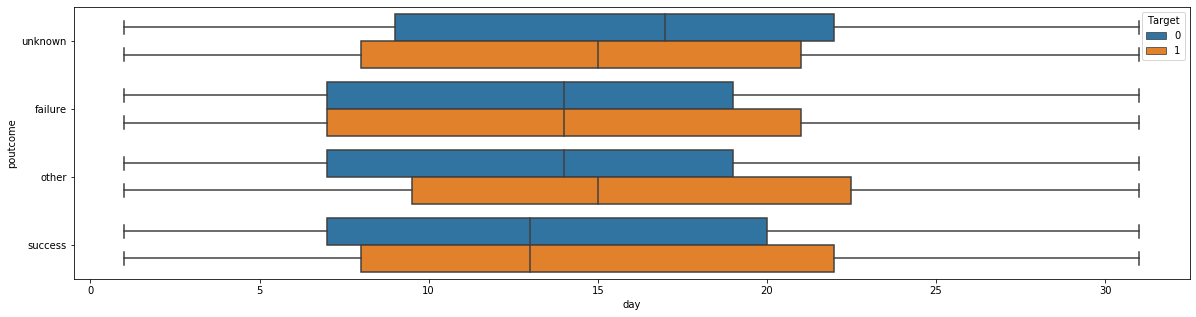

In [75]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "day", y = "poutcome", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> The median contact day for success and failure is approximately the same. There is also a large number of unknowns for which the contact day median is lower for term deposits "yes"</font>

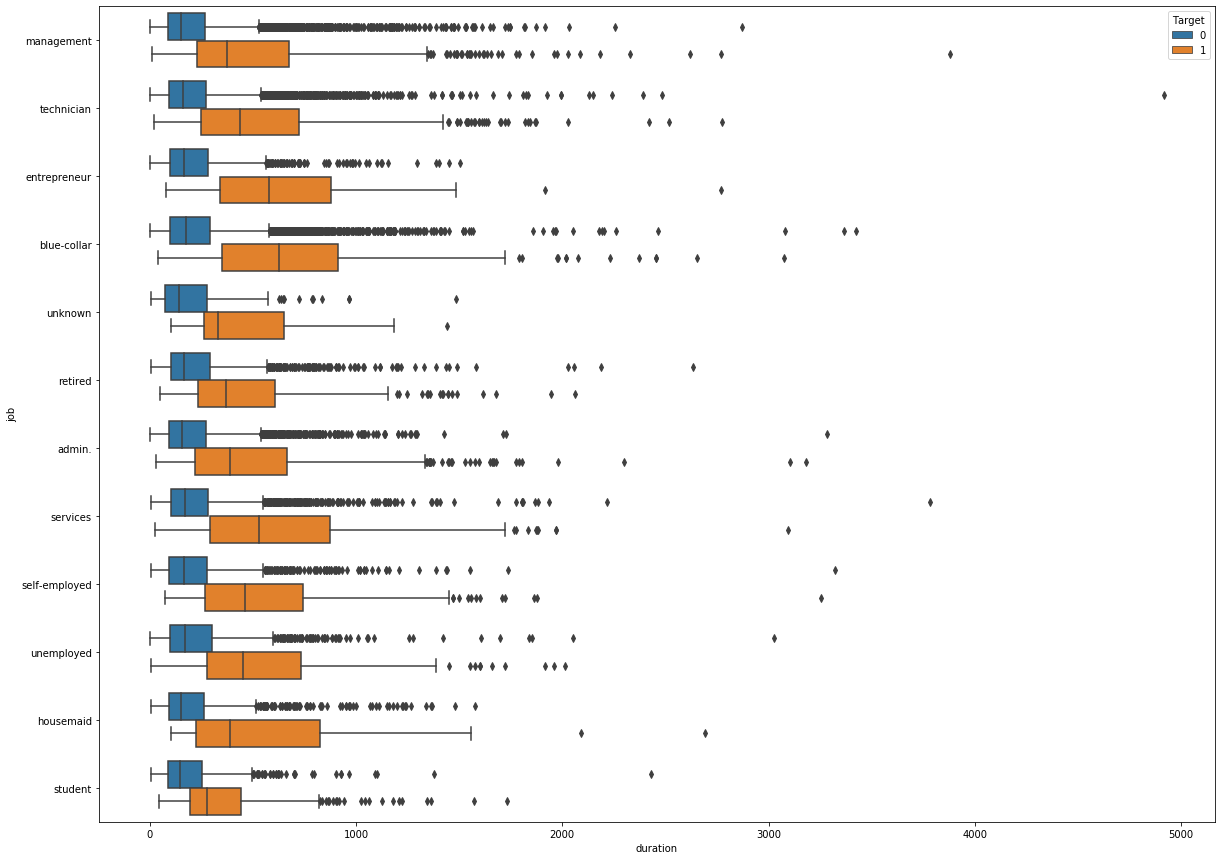

In [76]:
plt.figure(figsize = (20,15))
sns.boxplot(x = "duration", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> The duration is generally higher for target "yes". Seems to be a case of more engaged customers</font>

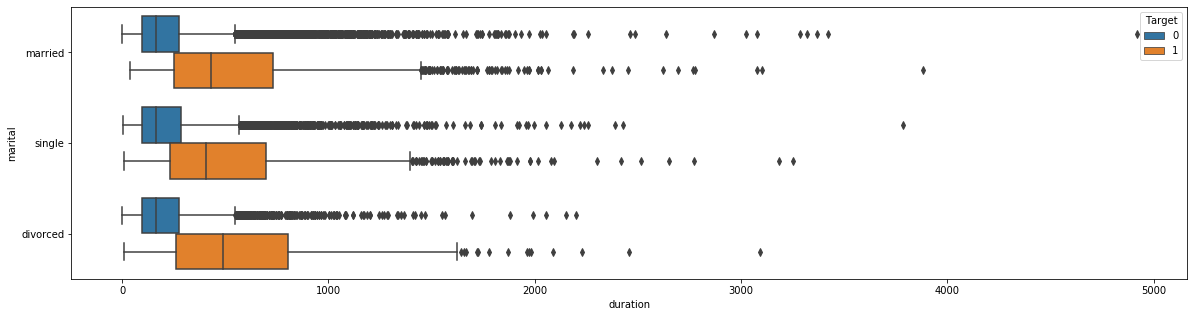

In [77]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "marital", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> same as above. Duration for contact is higher for target = "yes"</font>

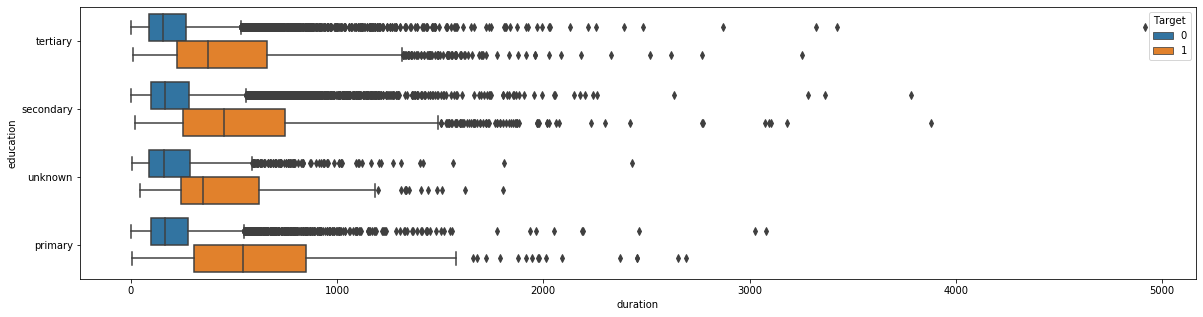

In [78]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "education", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple">As the level of education increases, the duration of the call for term deposits "yes", goes down</font>

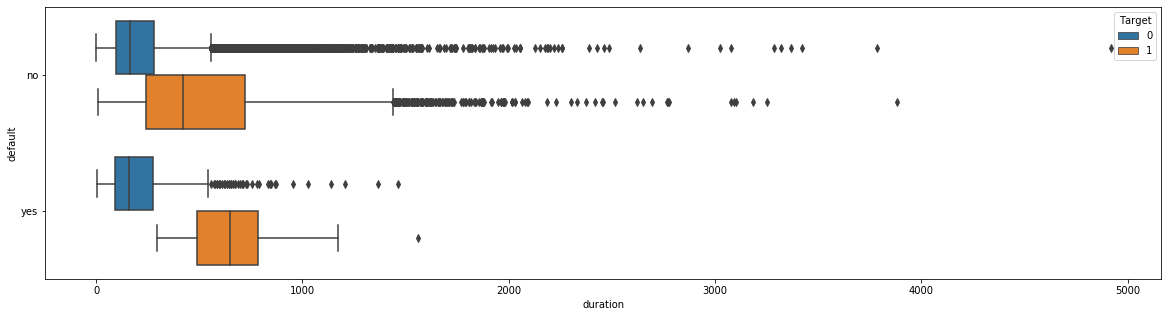

In [79]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "default", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People with defaults who make term deposits talk more than people who dont have a default and make term deposits</font>

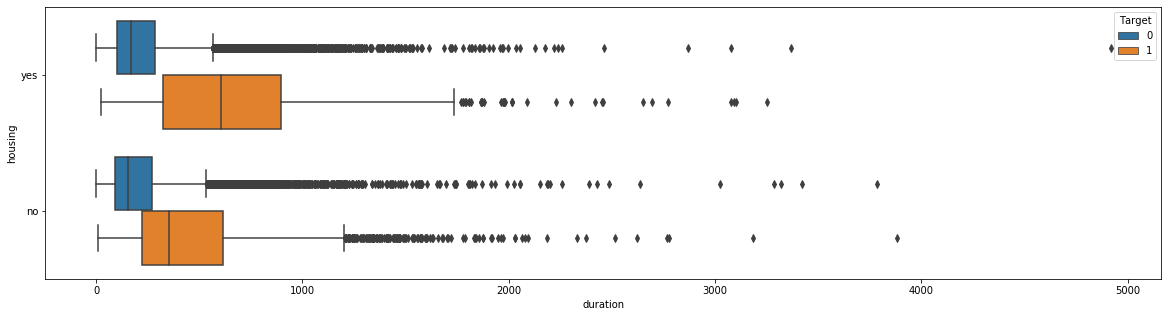

In [80]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "housing", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People with loans who have term deposits tend to talk more than people who dont have a loan and have term deposits</font>

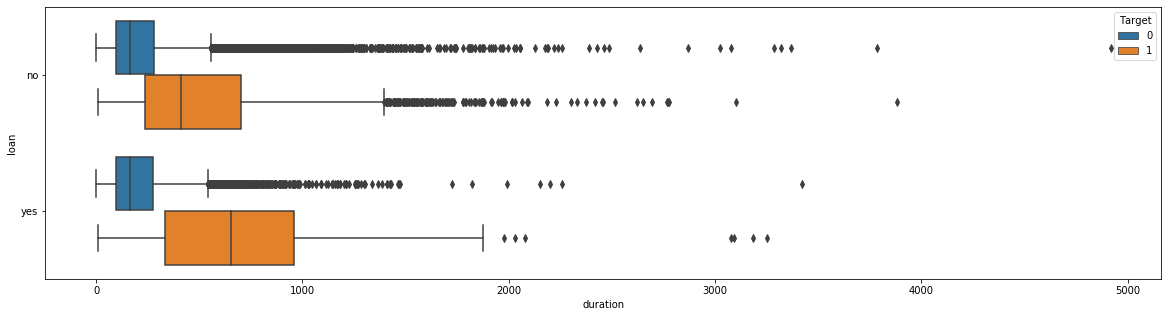

In [81]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "loan", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> People with loans who have term deposits tend to talk more than people who dont have a loan and have term deposits</font>

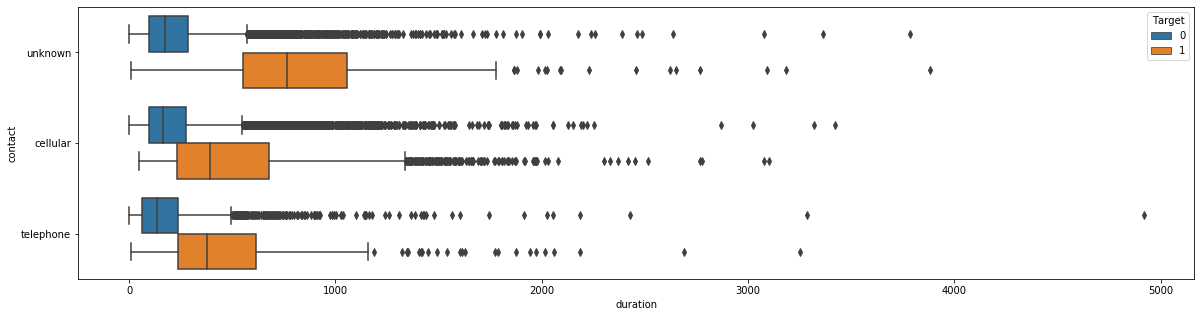

In [82]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "contact", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> The median duration for unknown is quite a bit more than cellular and telephones. This seems to be a different distribution altogether</font>

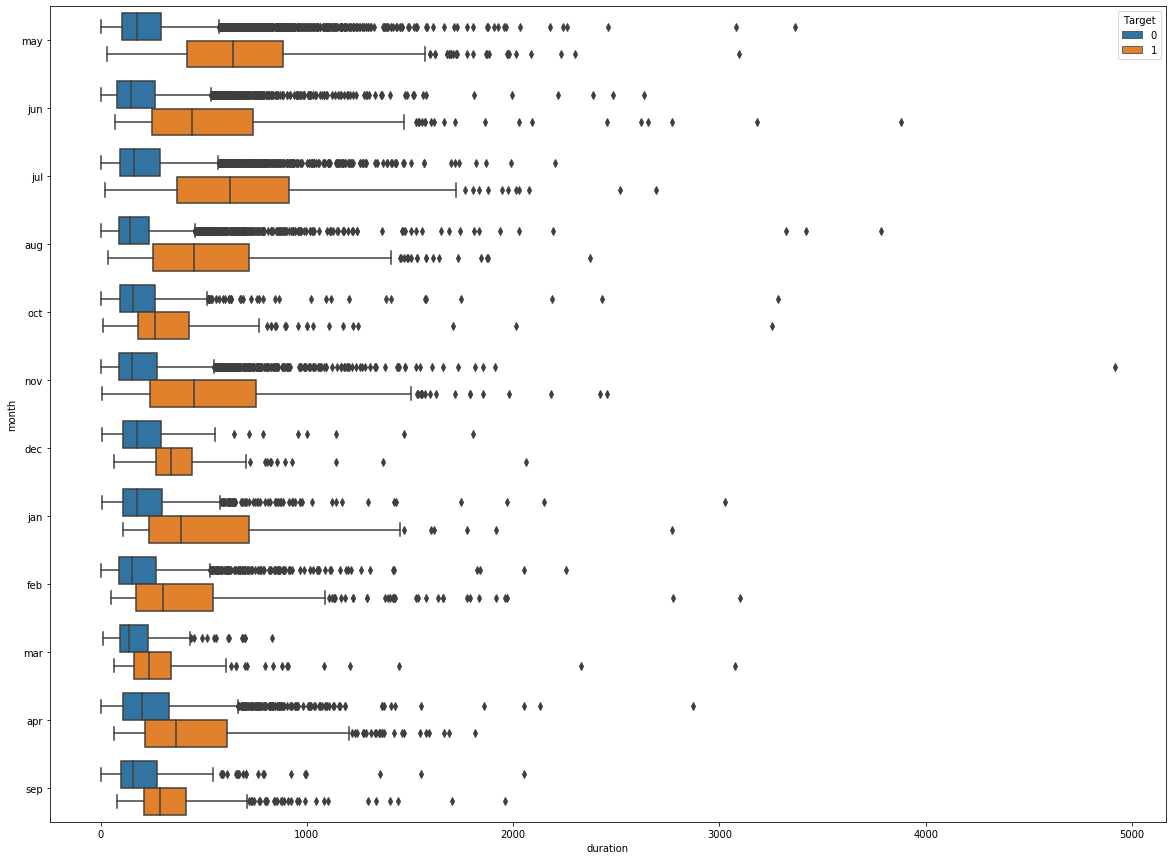

In [83]:
plt.figure(figsize = (20,15))
sns.boxplot(x = "duration", y = "month", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> The median call for target "1" or "yes" has higher duration in months where there are more contacts. 

</font>

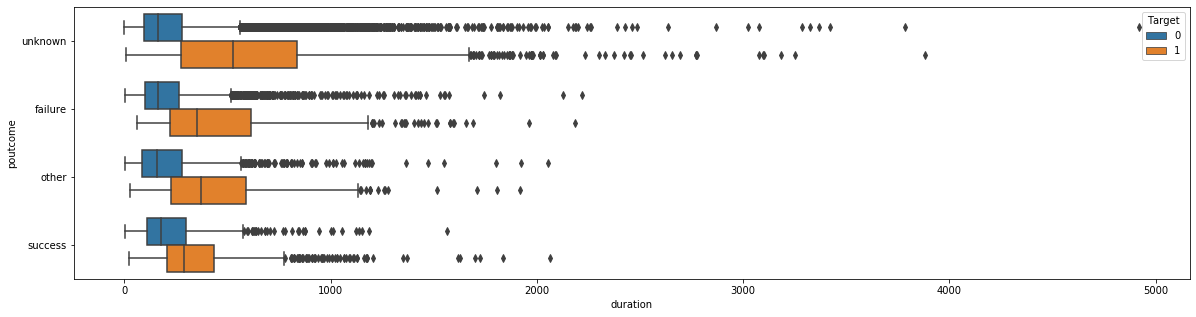

In [84]:
plt.figure(figsize = (20,5))
sns.boxplot(x = "duration", y = "poutcome", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> The median duration for poutcome "sucess" was lower. </font>

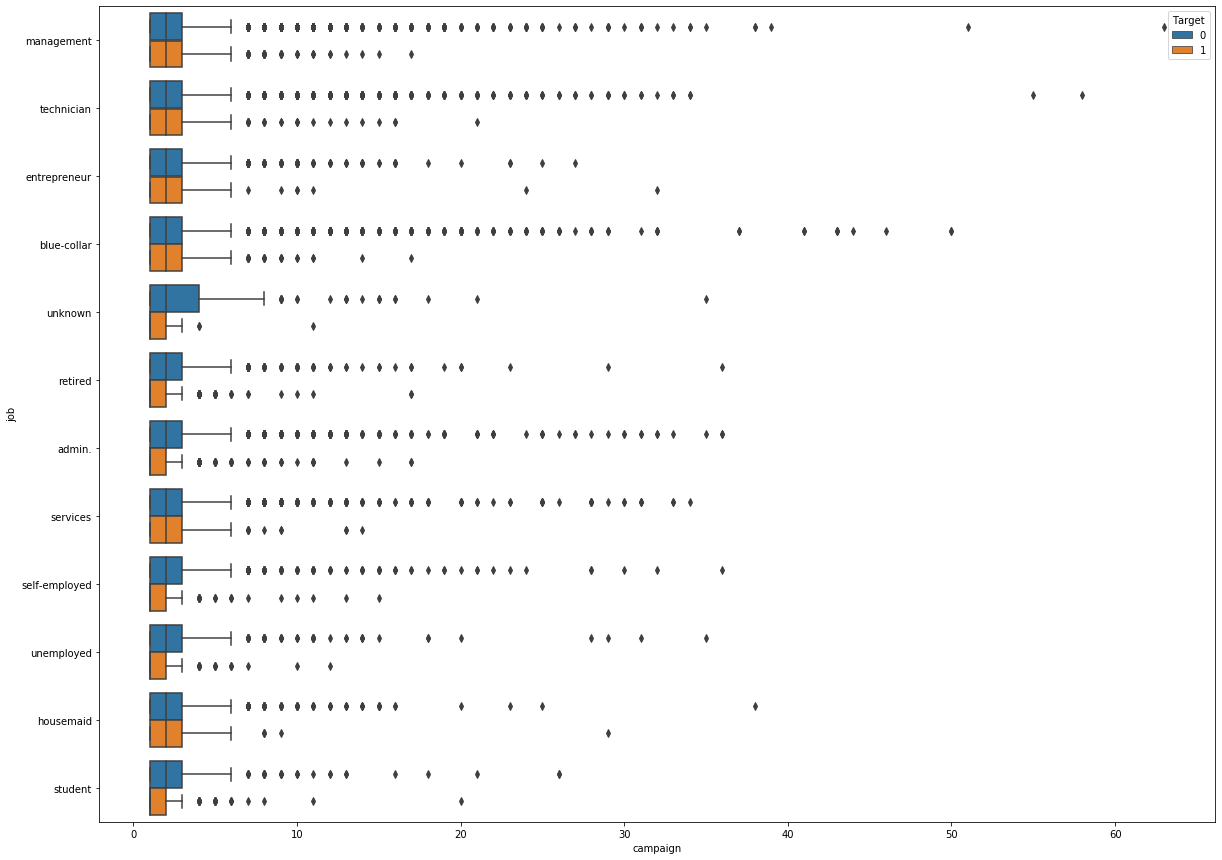

In [85]:
plt.figure(figsize = (20,15))
sns.boxplot(x = "campaign", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> This element seems to offer no clear information through a box plot. We are switching to a stripplot to see if the situation improves </font>

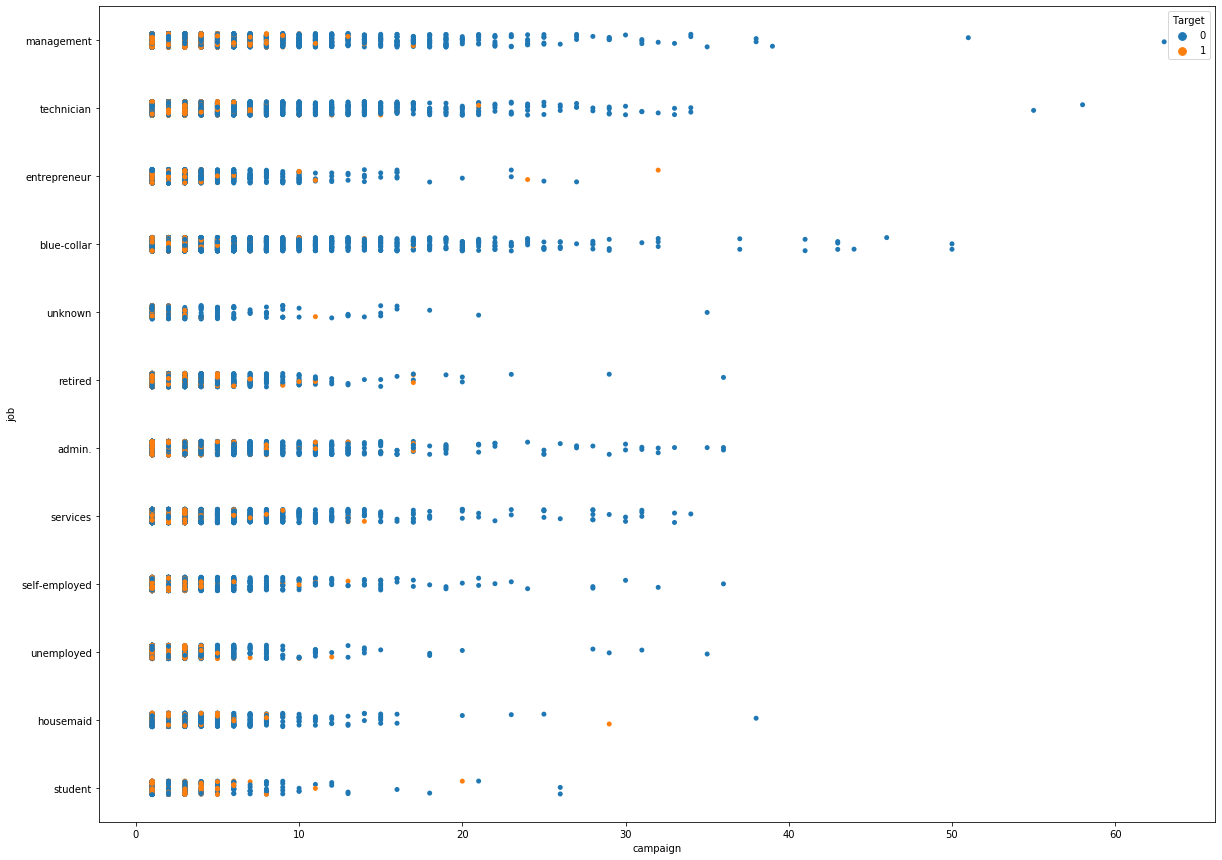

In [86]:
plt.figure(figsize = (20,15))
sns.stripplot(x = "campaign", y = "job", hue = "Target", jitter=True, data = bank_df)

### OBSERVATIONS

<font color = "purple"> Lower number of campaign connects seem to correlate with target "Yes". It could be that the people who want to say yes, say so even with limited contacts.</font>

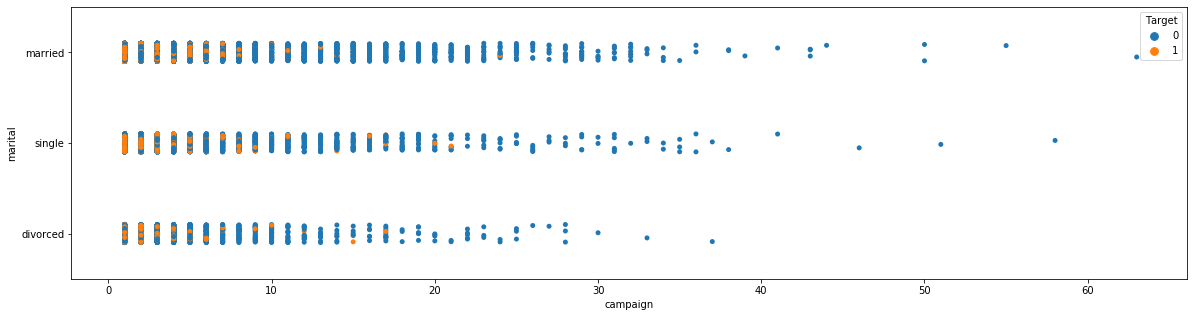

In [87]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "marital", hue = "Target", data = bank_df, jitter =True)

### OBSERVATIONS

<font color = "purple"> Same as above</font>

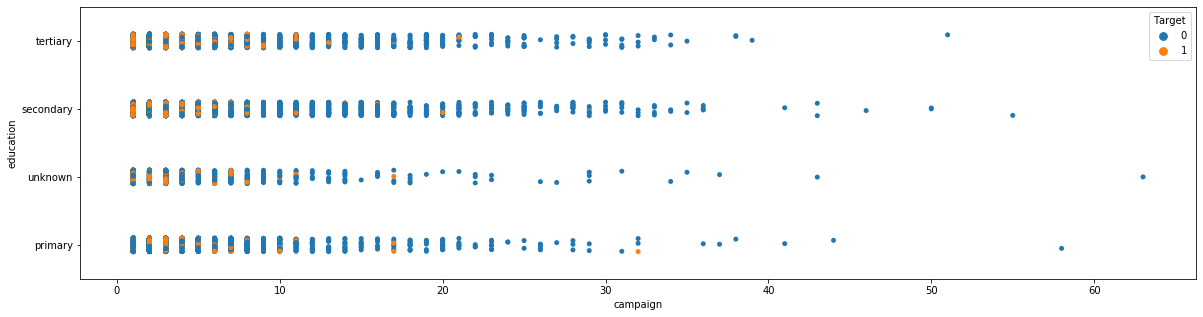

In [88]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "education", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> As the education level rises, there are more contacts for customers with target as "yes". Highly educated people need a larger number of contacts</font>

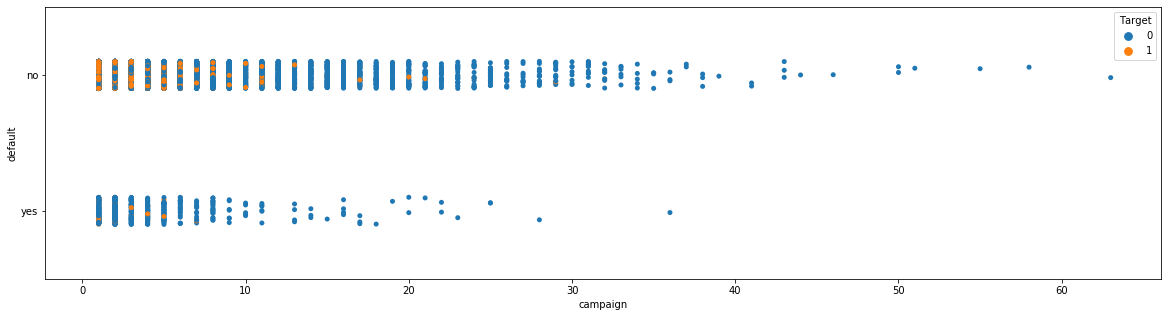

In [89]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "default", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> Very few defaulters make term deposits</font>

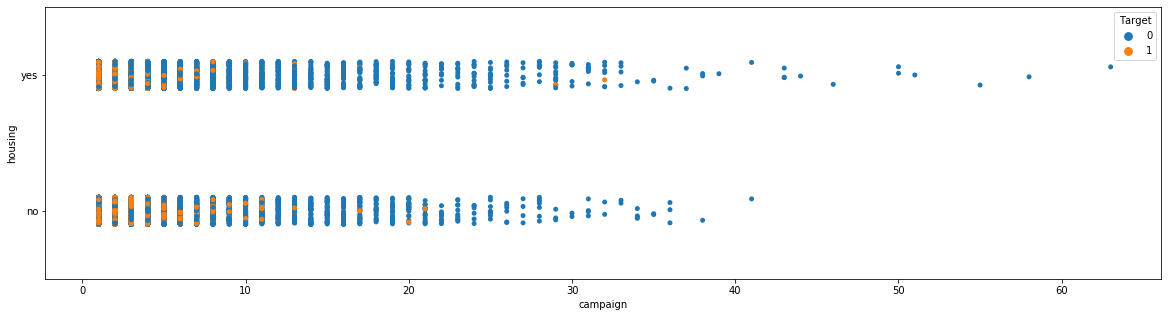

In [90]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "housing", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> People with no housing loans are more likely to make term deposits, although some of them need more contacts than for those with housing loans who choose to make term deposits</font>

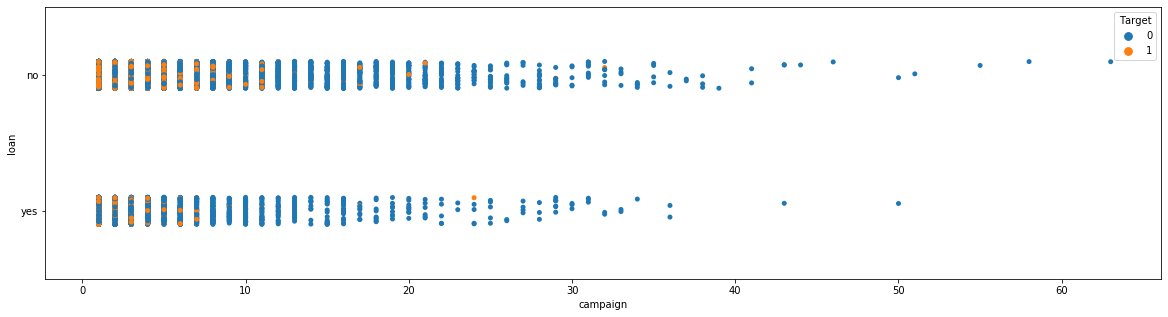

In [91]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "loan", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> People without personal loans are far more likely to make term deposits</font>

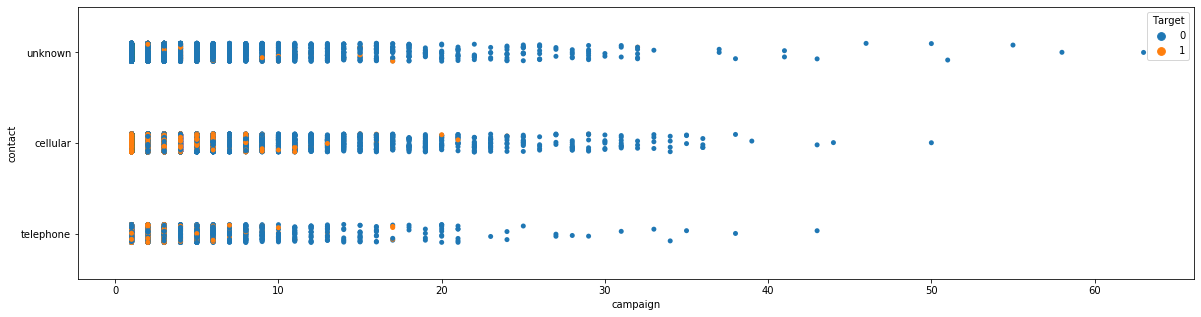

In [92]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "contact", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> People with Cellulars are more likely to make term deposits. Considering that unknowns make even lower deposits than those with telephone, it makes sense to order these three as unknown = -1, telephone = 1, cellular = 2</font>

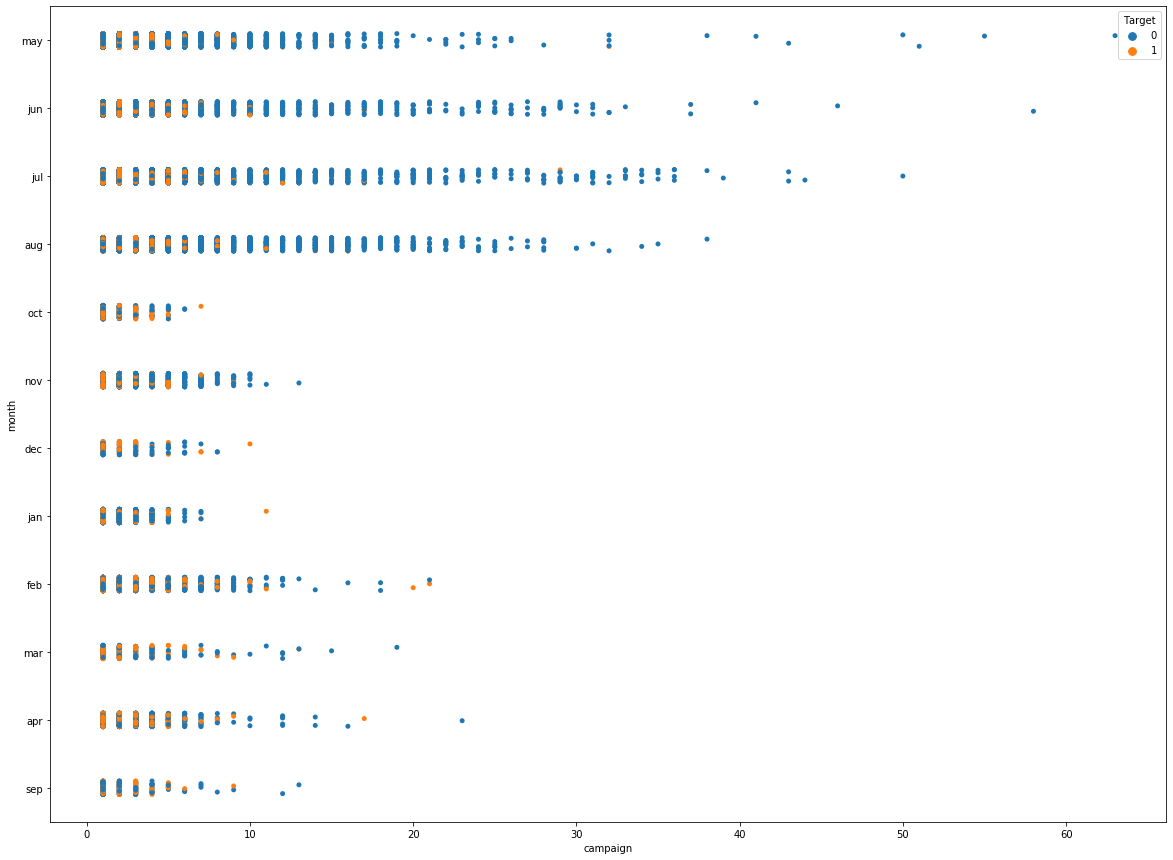

In [93]:
plt.figure(figsize = (20,15))
sns.stripplot(x = "campaign", y = "month", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> No additional Observations for months and days</font>

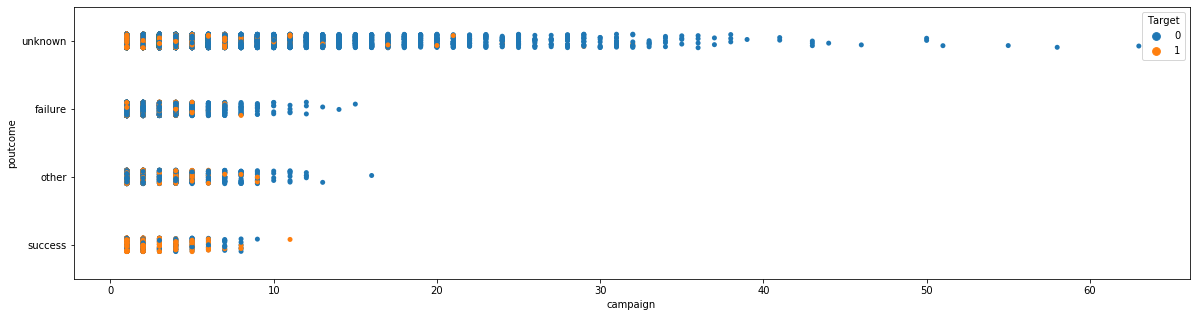

In [94]:
plt.figure(figsize = (20,5))
sns.stripplot(x = "campaign", y = "poutcome", hue = "Target", data = bank_df, jitter = True)

### OBSERVATIONS

<font color = "purple"> Success closely correlates with target "yes". However, unknowns also have a fair degree of target"yes". This means treatment for unknowns is required</font>

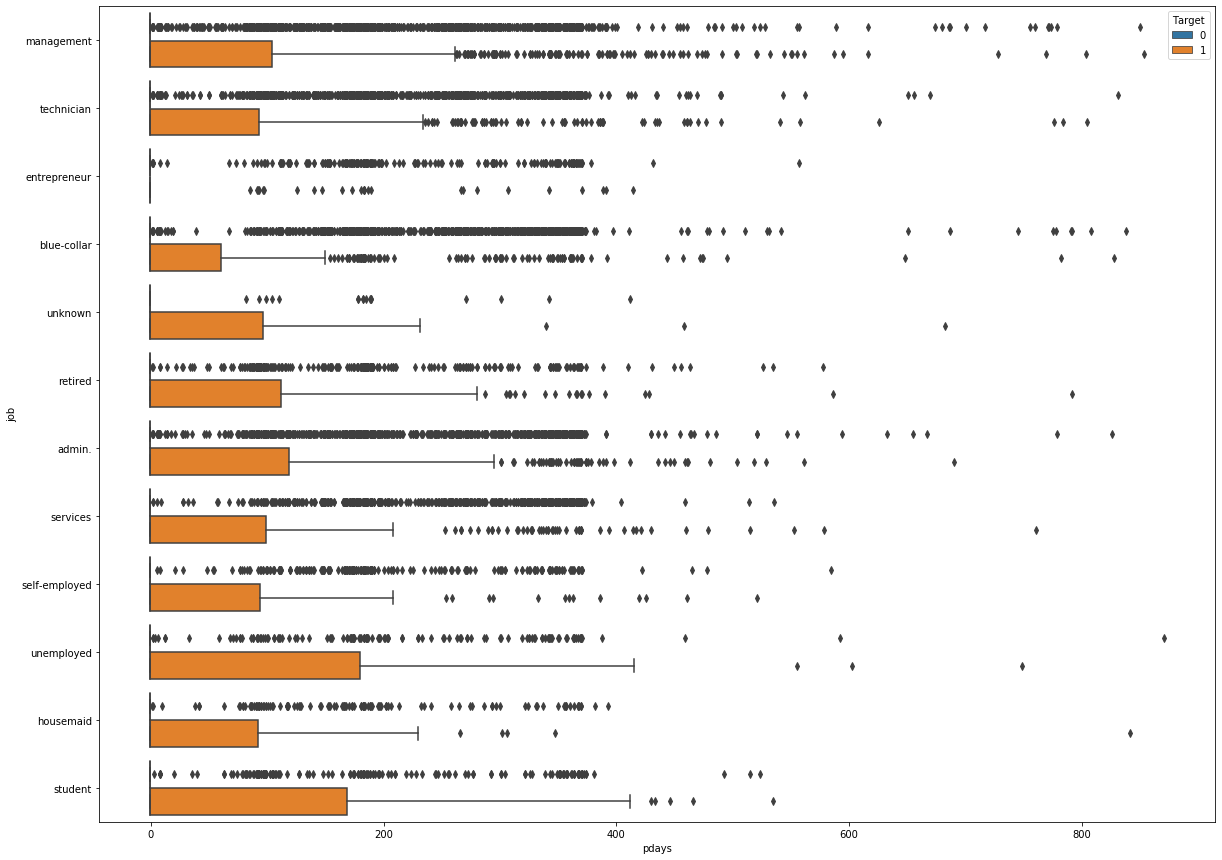

In [95]:
plt.figure(figsize = (20,15))
sns.boxplot(x = "pdays", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> Pdays does not seem to offer clearly visualizable information and we will not proceed on this analysis</font>

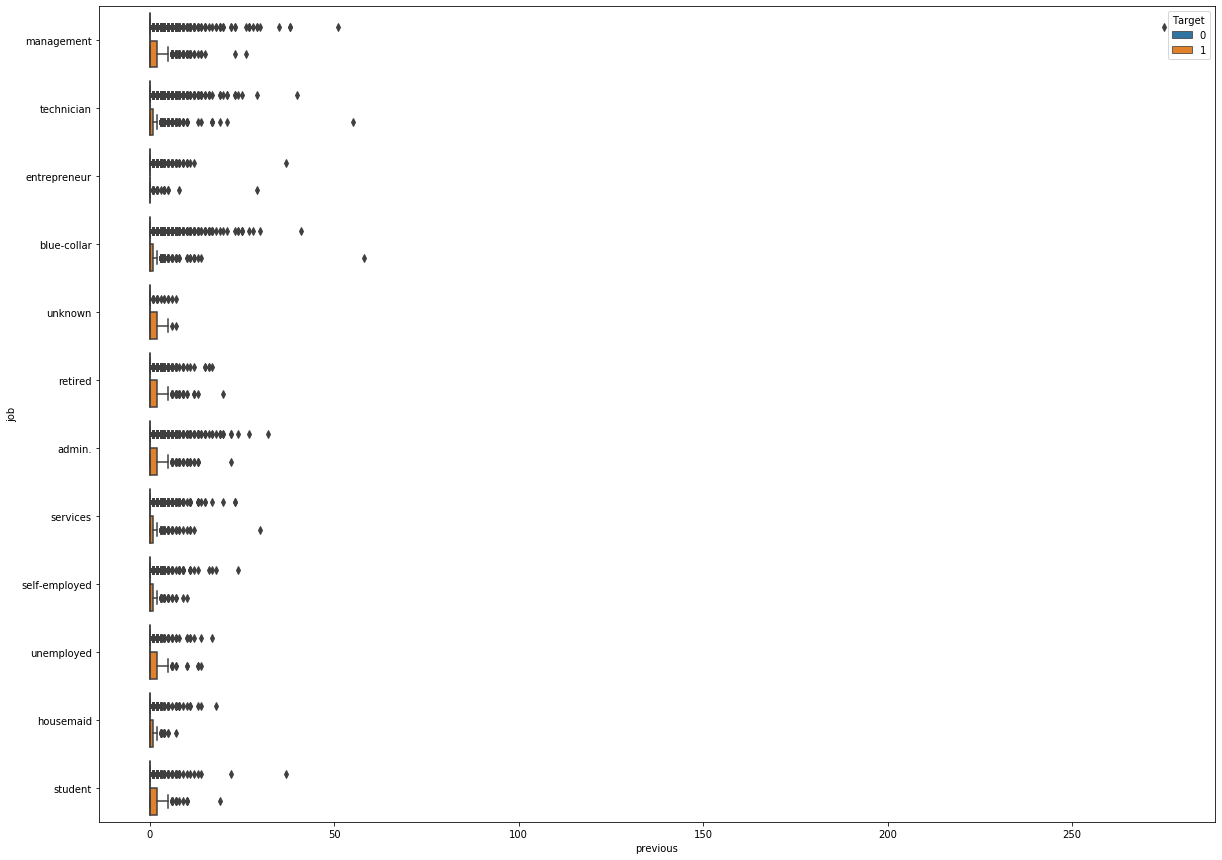

In [96]:
plt.figure(figsize = (20,15))
sns.boxplot(x = "previous", y = "job", hue = "Target", data = bank_df)

### OBSERVATIONS

<font color = "purple"> "Previous" does not seem to offer clearly visualizable information and we will not proceed on this analysis</font>

### <font color = "blue">Q3a. Shape of the data (2 marks)</font>

### <font color="green">Answer 3a:</font>

In [97]:
bank_df.shape

(45211, 17)

### OBSERVATIONS

<font color = "purple"> The data has 45211 rows and 17 columns</font>

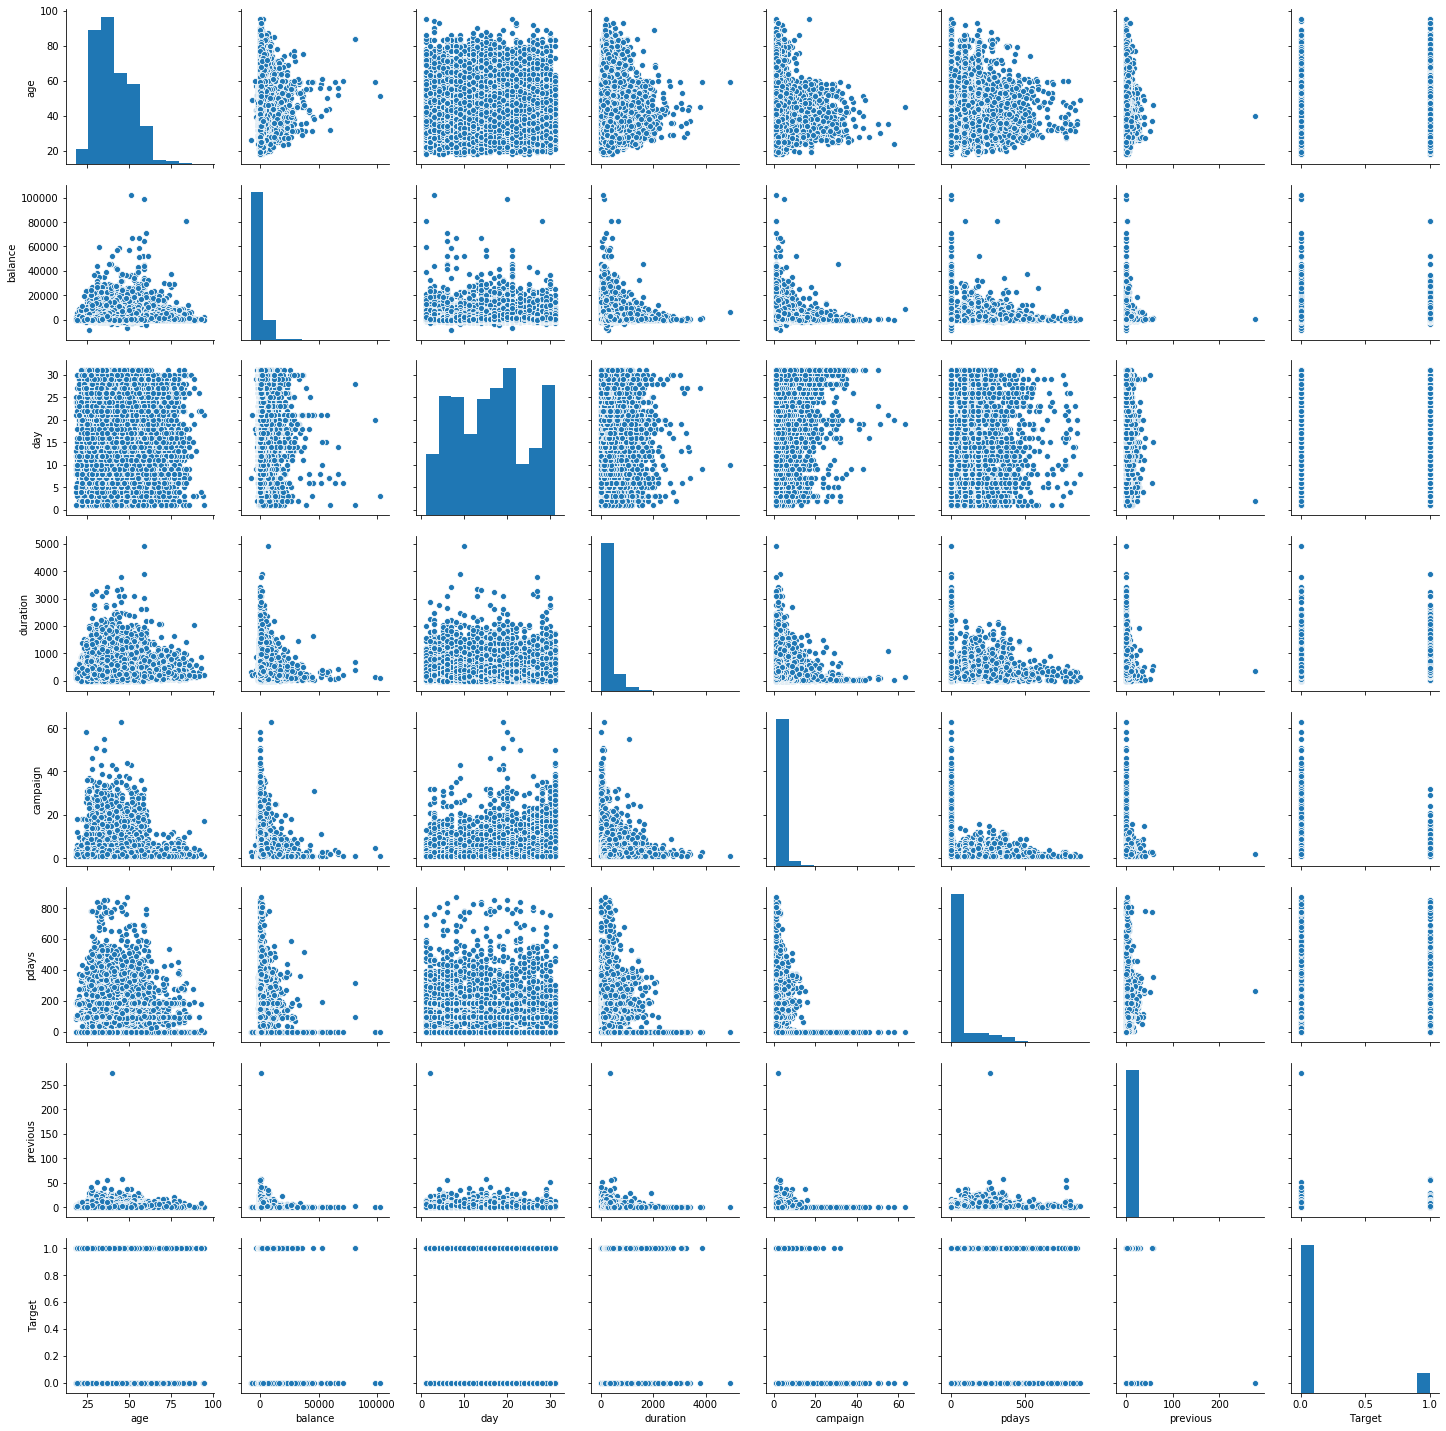

In [98]:
sns.pairplot(bank_df)

### OBSERVATIONS

<font color = "purple"> 
1. Lower balance customers are not regularly contacted (pdays vs balance)
2. Lower balance customers are also consuming large durations of campaign times
3. Campaign contacts less than 40 are generally the ones that get converted, so it seems useless to make more than 40 contacts
4. Other observations have been covered in univariate and bivariate analysis above
</font>

### <font color = "blue">Q3b. Data type of each attribute (2 marks)</font>

### <font color="green">Answer 3b:</font>

In [99]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 7.5+ MB


### OBSERVATIONS

<font color = "purple"> The data types look correct, The numeric types are appropriate, and the remaining will be transformed during data cleaning. </font>

### <font color = "blue">Q3c. Checking the presence of missing values (4 marks)</font>

### <font color="green">Answer 3c:</font>

In [100]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### OBSERVATIONS

<font color = "purple"> The nulls in this data set are 0. No adjustments required here</font>

In [101]:
print("Age:", bank_df["age"].min(), ",", bank_df["age"].max())
print("Balance:", bank_df["balance"].min(), ",", bank_df["balance"].max())
print("Day:", bank_df["day"].min(), ",", bank_df["day"].max())
print("Duration:", bank_df["duration"].min(), ",", bank_df["duration"].max())
print("Campaign:", bank_df["campaign"].min(), ",", bank_df["campaign"].max())
print("Pdays:", bank_df["pdays"].min(), ",", bank_df["pdays"].max())
print("Previous:", bank_df["previous"].min(), ",", bank_df["previous"].max())

Age: 18 , 95
Balance: -8019 , 102127
Day: 1 , 31
Duration: 0 , 4918
Campaign: 1 , 63
Pdays: -1 , 871
Previous: 0 , 275


### OBSERVATIONS

<font color = "purple"> The numerical data looks in the right ranges and there seem to be no out of bound values</font>

In [102]:
bank_df[bank_df == np.nan].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### OBSERVATIONS

<font color = "purple"> There is no Nan value in the dataset either</font>

### <font color = "blue">Q3d. 5 Point summary of numerical attributes (3 marks)</font>

### <font color="green">Answer 3d:</font>

In [103]:
np.percentile(bank_df["age"],[0,25,50,75,100])

array([18., 33., 39., 48., 95.])

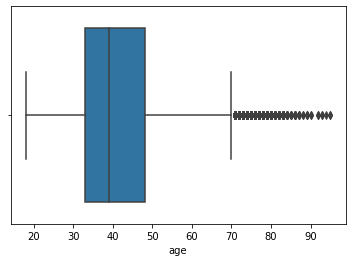

In [104]:
sns.boxplot(bank_df["age"])

### OBSERVATIONS

<font color = "purple"> Age median is 39, and the 25%,75% are 33, 48. which indicates a large number of people within this small age range </font>

In [105]:
np.percentile(bank_df["balance"],[0,25,50,75,100])

array([-8.01900e+03,  7.20000e+01,  4.48000e+02,  1.42800e+03,
        1.02127e+05])

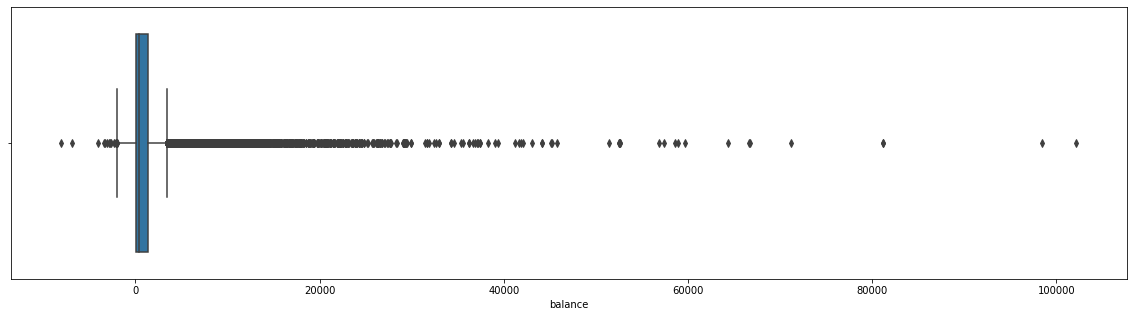

In [106]:
plt.figure(figsize =(20,5))
sns.boxplot(bank_df["balance"])

### OBSERVATIONS

<font color = "purple"> Balance median is 448, and the 25%,75% are 72, 1428.  </font>

In [107]:
np.percentile(bank_df["day"],[0,25,50,75,100])

array([ 1.,  8., 16., 21., 31.])

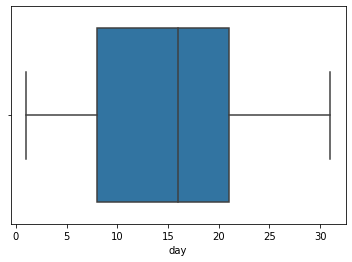

In [108]:
sns.boxplot(bank_df["day"])

### OBSERVATIONS

<font color = "purple"> Day median is 16 and the rest of the attributes are aligned with a 31 day month.  </font>

In [109]:
np.percentile(bank_df["campaign"],[0,25,50,75,100])

array([ 1.,  1.,  2.,  3., 63.])

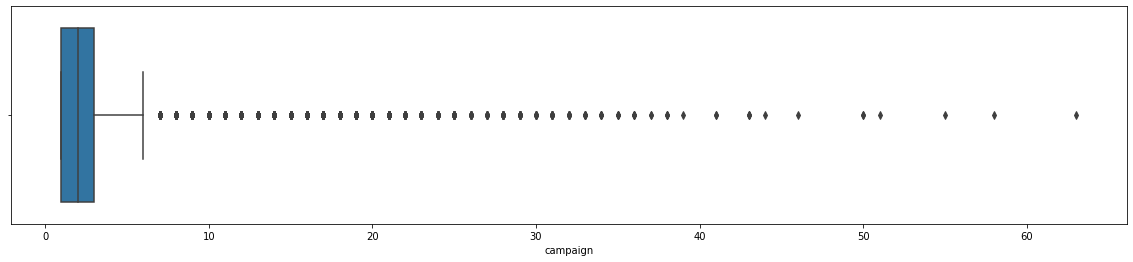

In [110]:
plt.figure(figsize = (20,4))
sns.boxplot(bank_df["campaign"])

### OBSERVATIONS

<font color = "purple"> Campaign median contacts are 2, and the 25%,75% are 1,3. As investigated previously, this distribution follows a long right tail and has a significant number of rows(>1000) that we have chosen not to drop  </font>

In [111]:
np.percentile(bank_df["duration"],[0,25,50,75,100])

array([   0.,  103.,  180.,  319., 4918.])

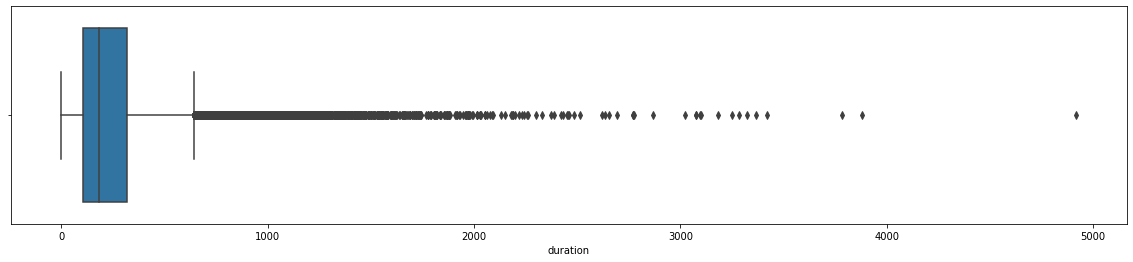

In [112]:
plt.figure(figsize = (20,4))
sns.boxplot(bank_df["duration"])

### OBSERVATIONS

<font color = "purple"> Duration median is 180. The average call lasts 6 minutes. However there are several that last much more and might need to be curtailed depending on further anlaysis (time should be spent on customers most likely to make the deposit) </font>

In [113]:
np.percentile(bank_df["pdays"],[0,25,50,75,100])

array([ -1.,  -1.,  -1.,  -1., 871.])

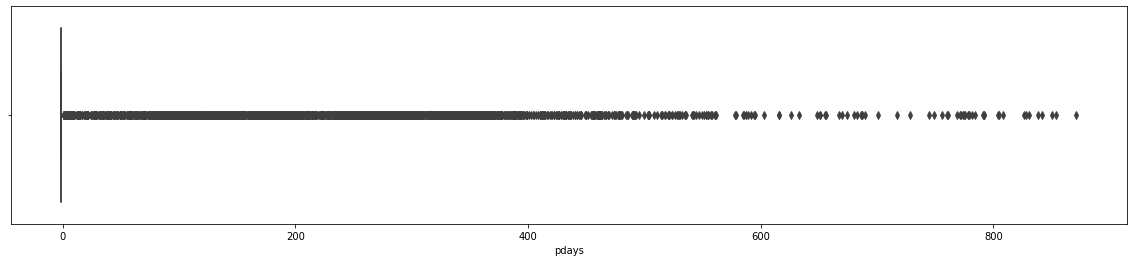

In [114]:
plt.figure(figsize = (20,4))
sns.boxplot(bank_df["pdays"])

### OBSERVATIONS

<font color = "purple">The Pday median is -1 as there is an overwhelming number of customers who have not been contacted. In such a case, it makes sense to treat this column. As the number of pdays increases, the probability of term deposit goes down, so it makes sense that these -1s should be converted to 999  </font>

In [115]:
np.percentile(bank_df["previous"],[0,25,50,75,100])

array([  0.,   0.,   0.,   0., 275.])

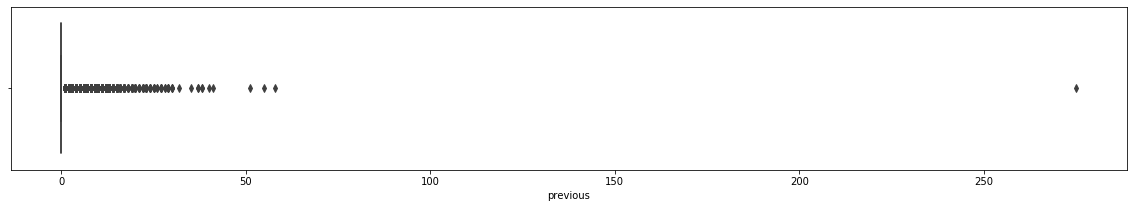

In [116]:
plt.figure(figsize = (20,3))
sns.boxplot(bank_df["previous"])

### OBSERVATIONS

<font color = "purple"> There is one clear outlier, that is well over 250. This row will be dropped or set to the average of the others.  </font>

### <font color = "blue">Q3e. Checking the presence of outliers (4 marks)</font>

### <font color="green">Answer 3e:</font>

In [117]:
z_critical = 3
age_z = stat.zscore(bank_df["age"])
print("Median",bank_df["age"].median())
print("Z max", age_z.max())
bank_df[age_z > z_critical]

Median 39.0
Z max 5.09140213258684


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,0
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,0
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,0
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,0
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,success,1
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183,1,other,0
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,0
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,1


### OBSERVATIONS

<font color = "purple"> Despite some outliers on the higher side, we will continue with this column as is. This is because the outliers seem to be in a reasonable range as proven in 5 point summaries  </font>

In [118]:
z_critical = 3
balance_z = stat.zscore(bank_df["balance"])
print("Median",bank_df["balance"].median())
print("Z max", balance_z.max())
bank_df[balance_z > z_critical]

Median 448.0
Z max 33.09477575528038


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,0
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,0
334,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,313,3,-1,0,unknown,0
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,1
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45075,28,technician,single,tertiary,no,11862,no,no,cellular,21,oct,549,2,238,13,other,1
45097,61,self-employed,married,tertiary,no,10861,no,no,cellular,25,oct,225,1,91,5,success,1
45098,44,technician,single,unknown,no,11115,no,no,cellular,25,oct,189,1,185,4,success,0
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183,1,other,0


### OBSERVATIONS

<font color = "purple"> Account balances seem to be well outside the acceptable Z score ranges. However, we have seen that there are quite a few occurences of balances in an outlier region. We will accept this as the nature of the distribution. The column will be scaled through min max scaler  </font>

In [119]:
z_critical = 3
duration_z = stat.zscore(bank_df["duration"])
print("Median",bank_df["duration"].median())
print("Z max", duration_z.max())
bank_df[duration_z > z_critical]

Median 180.0
Z max 18.094699808975527


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,0
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,0
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,42,unemployed,married,secondary,no,1289,no,no,cellular,15,oct,1176,3,92,6,success,1
45072,54,management,divorced,tertiary,no,5475,no,no,cellular,21,oct,1032,1,91,4,success,1
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,1


### OBSERVATIONS

<font color = "purple"> The duration has a large right skew due to outliers. However, we see that there are several calls that are above the Z score "3" range. Thus we will retain this column as is </font>

In [120]:
z_critical = 3
campaign_z = stat.zscore(bank_df["campaign"])
print("Median",bank_df["campaign"].median())
print("Z max", campaign_z.max())
print(bank_df[bank_df["campaign"] > 20]["campaign"].count())
print(bank_df[bank_df["campaign"] > 40]["campaign"].count())
bank_df[campaign_z > z_critical]

Median 2.0
Z max 19.44364734433979
244
13


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
2626,31,technician,married,secondary,no,106,yes,no,unknown,13,may,101,13,-1,0,unknown,0
2706,46,admin.,divorced,tertiary,no,3749,yes,no,unknown,13,may,69,19,-1,0,unknown,0
2967,37,technician,married,tertiary,yes,0,yes,no,unknown,14,may,93,14,-1,0,unknown,0
3044,51,unemployed,married,secondary,no,425,yes,no,unknown,14,may,286,14,-1,0,unknown,0
3079,28,blue-collar,married,primary,no,0,no,no,unknown,14,may,17,24,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38767,28,admin.,married,secondary,no,788,yes,no,cellular,18,may,11,14,-1,0,unknown,0
40336,57,entrepreneur,married,tertiary,no,0,no,no,telephone,18,jun,390,15,-1,0,unknown,0
41380,43,unemployed,married,unknown,no,970,yes,no,telephone,1,sep,513,13,288,11,failure,0
42315,62,technician,married,secondary,no,135,yes,no,telephone,16,nov,446,13,96,1,other,0


### OBSERVATIONS

<font color = "purple"> Even the campaign column has information which follows a set distribution. While the outliers are statistically quite far away, but they tend to follow the distribution of the column. We will thus retain them </font>

In [121]:
z_critical = 3
pdays_z = stat.zscore(bank_df["pdays"])
print("Median",bank_df["pdays"].median())
print("Z max", pdays_z.max())
bank_df[pdays_z > z_critical]

Median -1.0
Z max 8.297430992711057


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
32111,32,services,married,secondary,no,1129,yes,no,cellular,15,apr,903,2,341,2,failure,1
32147,41,blue-collar,married,secondary,no,217,yes,no,cellular,15,apr,375,2,344,1,failure,0
32230,33,management,single,secondary,no,-665,yes,yes,cellular,16,apr,324,1,342,1,failure,0
32234,31,technician,single,tertiary,no,2530,yes,no,cellular,16,apr,60,1,342,1,failure,0
32252,30,management,single,tertiary,no,726,yes,no,cellular,16,apr,39,1,342,3,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45166,41,unemployed,single,tertiary,no,79,no,no,telephone,9,nov,394,1,390,2,success,1
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,0
45177,36,admin.,divorced,secondary,no,1224,yes,no,cellular,12,nov,482,1,374,1,success,1
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,1


### OBSERVATIONS

<font color = "purple"> The pdays data seems to be correct. There is a signficant portion of pdays which seem like outliers. This is primarily due to the large number of -1s in the distribution. This will change if we replace the -1s with 999 </font>

In [122]:
z_critical = 3
previous_z = stat.zscore(bank_df["previous"])
print("Median",bank_df["previous"].median())
print("Z max", previous_z.max())
bank_df[previous_z > z_critical]

Median 0.0
Z max 119.13598229870267


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,nov,26,1,101,11,other,0
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,nov,74,1,167,16,other,0
24331,36,management,married,tertiary,no,5057,yes,no,cellular,17,nov,70,1,166,10,failure,0
24506,42,unemployed,married,unknown,no,970,yes,no,telephone,17,nov,725,1,119,10,success,0
24556,44,management,married,tertiary,no,1451,yes,no,cellular,17,nov,157,3,150,12,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,0
45172,30,technician,single,tertiary,no,2325,no,no,cellular,10,nov,134,1,92,8,success,0
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1


### OBSERVATIONS

<font color = "purple"> The previous column has 1 major outlier, that is the value 275. This will be replaced by an average in data cleaning </font>

## <font color = "blue">Q4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (15 marks)</font>

## <font color="green">Answer 4:</font>

<font color = "magenta">

Viewing the data
    
</font>

In [123]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [124]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 7.5+ MB


In [125]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


<font color = "magenta">

### Data cleaning and preprocessing

we replace the outliers in column "previous". there is only 1(275) that seems like an error.
Also we replace the -1 in pdays with 999
</font>

In [126]:
def update_previous(previous):
    if previous == 275:
        return bank_df[bank_df["previous"] < 275]["previous"].mean()
    else:
        return previous

bank_df["previous"] = bank_df["previous"].apply(update_previous)

In [127]:
def update_pdays(pdays):
    if pdays == -1:
        return 999
    else:
        return pdays

bank_df["pdays"] = bank_df["pdays"].apply(update_pdays) 

<font color = "magenta">

### Analysis of unknown variables
We look at the columns that have data types unknown and determine appropriate actions for them
</font>

In [128]:
bank_df[bank_df["Target"] == 1]["education"].value_counts() / bank_df["education"].value_counts() 

secondary    0.105594
tertiary     0.150064
primary      0.086265
unknown      0.135703
Name: education, dtype: float64

### OBSERVATIONS

<font color = "purple"> The unknowns in education seem to be somewhere between tertiary and secondary in terms of the target variable relevance. Thus we will use the grading - primary:0, secondary:1, unknown:2, tertiary:3 </font>

In [129]:
bank_df[bank_df["Target"] == 1]["contact"].value_counts() / bank_df["contact"].value_counts() 

cellular     0.149189
unknown      0.040707
telephone    0.134205
Name: contact, dtype: float64

### OBSERVATIONS

<font color = "purple"> The unknowns in contact seem to be much below cellular and telephone in terms of the target variable relevance. Thus we will use the grading - "unknown" : -1, "telephone": 1, "cellular": 2 </font>

In [130]:
bank_df[bank_df["Target"] == 1]["poutcome"].value_counts() / bank_df["poutcome"].value_counts() 

failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: poutcome, dtype: float64

### OBSERVATIONS

<font color = "purple"> The unknowns in poutcome seem to be much below the other categories in terms of the target variable relevance. Thus we will use the grading - "unknown" : -1, "failure": 1, "other": 2, "success": 3 </font>

<font color = "magenta"> 

### Data cleaning and preprocessing continued
    
we replace the education, contact and poutcome columns with the sequence values determined during our analysis
</font>

In [131]:
replace_struc = {
    "education": { "tertiary": 3, "secondary" : 1, "primary":0, "unknown":2},
    "contact" : {"unknown" : -1, "telephone": 1, "cellular": 2},
    "poutcome": {"unknown" : -1, "failure": 1, "other": 2, "success": 3}
}
oneHotCols = ["job", "marital", "default", "housing", "loan", "month"]
bank_df = pd.get_dummies(bank_df, columns = oneHotCols, drop_first=True).replace(replace_struc)

In [132]:
bank_df = bank_df.drop (["day"], axis = 1)
bank_df.head()

,age,education,balance,contact,duration,campaign,pdays,previous,poutcome,Target,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,2143,-1,261,1,999,0.0,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,1,29,-1,151,1,999,0.0,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,1,2,-1,76,1,999,0.0,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,2,1506,-1,92,1,999,0.0,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,2,1,-1,198,1,999,0.0,-1,0,...,0,0,0,0,0,0,1,0,0,0


<font color = "magenta"> 

#### Scaling the data
    
The numerical columns with large values are scaled and brought down into a range that converges faster
</font>

In [133]:
scaler = MinMaxScaler()
transformed_columns = scaler.fit_transform(bank_df[["age", "education", "balance", "contact", "campaign", "pdays", "previous", "poutcome"]])
transformed_df = pd.DataFrame(transformed_columns, columns = ["age", "education", "balance", "contact", "campaign", "pdays", "previous", "poutcome"])

In [134]:
bank_df = pd.concat([transformed_df, bank_df.drop(["age", "education", "balance", "contact", "campaign", "pdays", "previous", "poutcome", "duration"], axis = 1)], axis = 1)

In [135]:
bank_df.head()

,age,education,balance,contact,campaign,pdays,previous,poutcome,Target,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,1.000000,0.092259,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0.333333,0.073067,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0.333333,0.072822,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0.666667,0.086476,0.0,0.0,1.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0.666667,0.072812,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


### OBSERVATIONS

<font color = "purple"> We now have 36 features in our dataset </font>

<font color = "magenta"> 

### Preparing training and test data
</font>

In [136]:
y = bank_df.pop("Target")
x = bank_df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
bank_df.head()

,age,education,balance,contact,campaign,pdays,previous,poutcome,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,1.000000,0.092259,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0.333333,0.073067,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0.333333,0.072822,0.0,0.0,1.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0.666667,0.086476,0.0,0.0,1.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0.666667,0.072812,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


## <font color = "blue">Q5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. (15 marks)</font>

## <font color="green">Answer 5:</font>

<font color = "magenta"> 

### Logistic regression
</font>

In [137]:
logistic_regressor = LogisticRegression(solver = "liblinear")
logistic_regressor.fit (x_train, y_train)
y_pred_logistic = logistic_regressor.predict (x_test)

In [138]:
print(classification_report (y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.65      0.15      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



[[11833   134]
 [ 1350   247]]


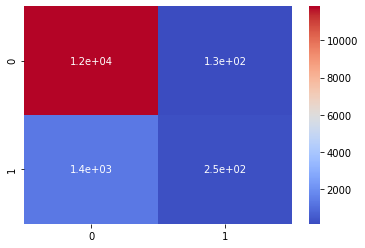

In [139]:
print(confusion_matrix(y_test, y_pred_logistic))
cm = confusion_matrix(y_test, y_pred_logistic, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

In [140]:
logistic_regressor.score(x_test, y_test)

0.8905927455028015

### OBSERVATIONS

<font color = "purple"> Although overall, the logistic regression scores well (89%), the imbalance of the data causes it to perform poorly on recall for cases where target = "1" </font>

<font color = "magenta"> 

### Evaluating Logistic regression performance
</font>

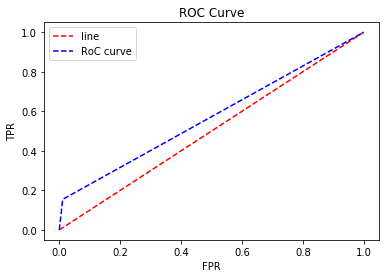

In [141]:
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_logistic,tpr_logistic,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

<font color = "magenta"> 

#### Evaluating the Logistic curve for all probabilistic output
</font>

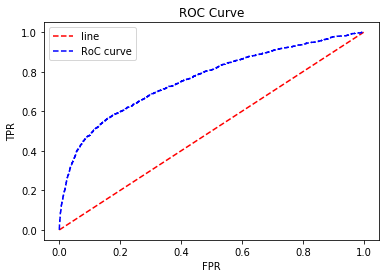

In [142]:
y_pred_logistic_prob = logistic_regressor.predict_proba(x_test)
y_pred_logistic_prob = y_pred_logistic_prob[:,1] 
fpr_logistic_prob, tpr_logistic_prob, thresholds_logistic_prob = roc_curve(y_test, y_pred_logistic_prob)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_logistic_prob,tpr_logistic_prob,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

<font color = "magenta"> 

### Creating an AUC based scorer for GRID search (Customer_Scorer for all other ensembles)
</font>

In [143]:
#developing an AUC Scorer to use with grid search
#The idea is to help maximize the auc values in the outcome
def auc_val(y_test, y_predicted):     
    fpr_custom, tpr_custom, _ = roc_curve(y_test, y_predicted, pos_label=1) 
    return (auc(fpr_custom, tpr_custom))
custom_scorer = make_scorer(auc_val, greater_is_better=True, needs_proba=True)

<font color = "magenta"> 

### Creating an AUC based scorer for GRID search (Customer_Scorer for ada)
</font>

In [144]:
#developing an AUC Scorer to use with grid search
#The idea is to help maximize the auc values in the outcome
def auc_val_ada(y_test, y_predicted):     
    fpr_custom, tpr_custom, _ = roc_curve(y_test, y_predicted, pos_label=1) 
    score_df = pd.DataFrame(columns = ["test", "predicted"])
    score_df["test"] = y_test
    score_df["predicted"] = y_predicted
    penalty = np.mean(score_df [score_df["test"]==1]["test"] != score_df [score_df["test"]==1]["predicted"])
    return (auc(fpr_custom, tpr_custom) - penalty) ##Applies penalty term. Will likely return negative value
custom_scorer_ada = make_scorer(auc_val_ada, greater_is_better=True, needs_proba=True)

<font color = "magenta"> 

### KNN Classification
</font>

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11967
           1       0.30      0.30      0.30      1597

    accuracy                           0.84     13564
   macro avg       0.60      0.60      0.60     13564
weighted avg       0.84      0.84      0.84     13564

[[10875  1092]
 [ 1122   475]]


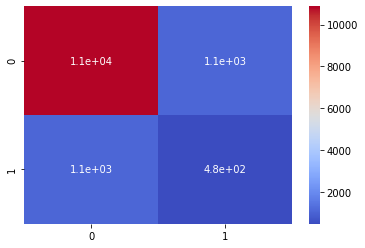

In [145]:
knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = "euclidean", weights = "distance")
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> The base KNN does slightly better than the logistic regression in terms of recall on Target = "1" cases. We will attempt to improve it through optimization based on an elbow plot </font>

<font color = "magenta"> 

#### Elbow plot to determine optimal neighbours
</font>

In [146]:
error_rate = []
for i in range(3,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = i, metric = "euclidean", weights = "distance")
    knn_classifier.fit(x_train, y_train)
    y_pred_knn = knn_classifier.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))

Text(0, 0.5, 'Mean Error')

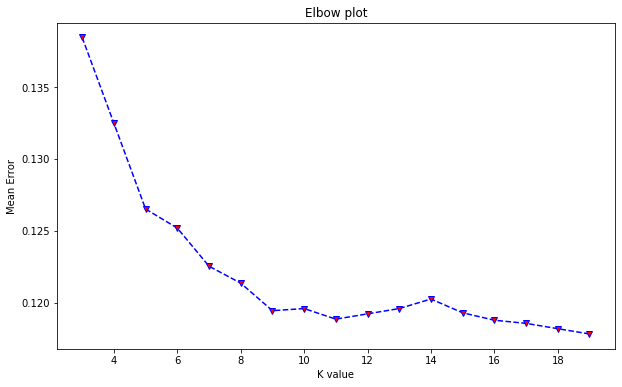

In [147]:
plt.figure(figsize = (10,6))
plt.plot (range(3,20), error_rate, color = 'blue', ls = '--', marker = 'v', markerfacecolor = "red")
plt.title ("Elbow plot")
plt.xlabel("K value")
plt.ylabel("Mean Error")

### OBSERVATION

<font color = "purple">

elbows emerge at k = 9, k = 11. We will choose k = 11 for further analysis
</font>

<font color = "magenta"> 

### Developing optimized KNN
</font>

In [148]:
knn_classifier = KNeighborsClassifier(n_neighbors = 11, metric = "euclidean", weights = "distance")

In [149]:
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11967
           1       0.49      0.22      0.31      1597

    accuracy                           0.88     13564
   macro avg       0.70      0.60      0.62     13564
weighted avg       0.85      0.88      0.86     13564

[[11597   370]
 [ 1242   355]]


0.9998420071412772
0.881156001179593


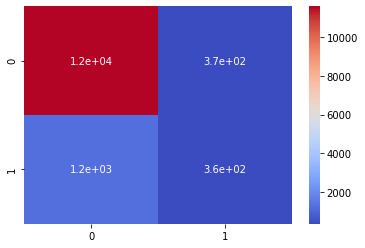

In [150]:
print(knn_classifier.score(x_train, y_train))
print(knn_classifier.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred_knn, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> The optimal KNN scores better overall as compared to the logistic regression but continues to perform poorly in recall for target "1" cases </font>

<font color = "magenta"> 

### Evaluating performance of KNN
</font>

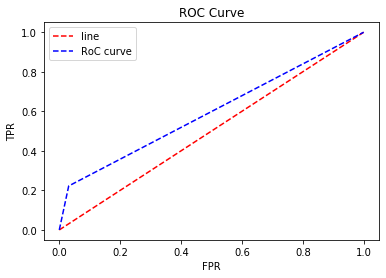

In [151]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_knn,tpr_knn,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

<font color = "magenta"> 

#### Evaluating for probabilistic output
</font>

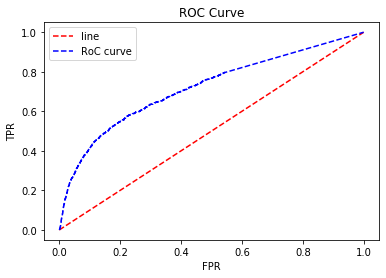

In [152]:
y_pred_knn_prob = knn_classifier.predict_proba(x_test)
y_pred_knn_prob = y_pred_knn_prob[:,1]
fpr_knn_prob, tpr_knn_prob, thresholds_knn_prob = roc_curve(y_test, y_pred_knn_prob)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_knn_prob,tpr_knn_prob,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

## <font color = "blue">Q6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. (15 marks)</font>

## <font color="green">Answer 6:</font>

<font color = "magenta"> 

### Creating a basic Decision tree
</font>

In [153]:
d_tree = DecisionTreeClassifier(criterion = "gini")
d_tree.fit(x_train, y_train)
d_tree.score(x_train, y_train)

0.9998420071412772

In [154]:
d_tree.score(x_test, y_test)

0.8291801828369213

### OBSERVATIONS

<font color = "purple"> An unparameterized decision tree seems to overfit the training data and score lower on the test </font>

<font color = "magenta"> 

### after a few fitments, we choose a depth of 7 to create a more evenly fit tree.
</font>

0.8992637532783518
0.891108817457977
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.64      0.17      0.27      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



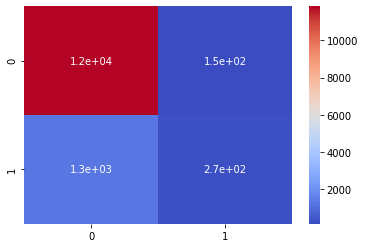

In [155]:
d_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 7)
d_tree.fit(x_train, y_train)
print(d_tree.score(x_train, y_train))
print(d_tree.score(x_test, y_test))
y_pred_dtree = d_tree.predict(x_test)
print(classification_report(y_test, y_pred_dtree))
cm = confusion_matrix(y_test, y_pred_dtree, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

<font color = "magenta"> 

### Evaluating Decision Tree performance
</font>

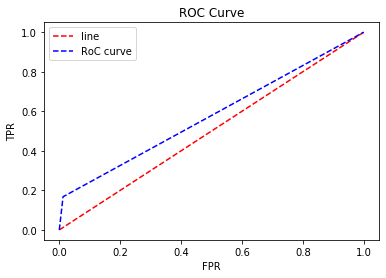

In [156]:
fpr_dtree, tpr_dtree, threshold_dtree = roc_curve(y_test, y_pred_dtree)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_dtree,tpr_dtree,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

<font color = "magenta"> 

### Evaluating for probabilistic output. However, it remains the same due to the nature of the first tree
</font>

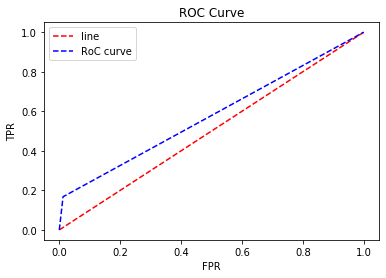

In [157]:
y_pred_dtree_prob = d_tree.predict_proba(x_test)
y_pred_dtree_prob = y_pred_dtree_prob[:,1]
fpr_dtree_prob, tpr_dtree_prob, threshold_dtree_prob = roc_curve(y_test, y_pred_dtree)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_dtree_prob,tpr_dtree_prob,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

<font color = "magenta"> 

### Optimizing decision tree through grid search
</font>

In [158]:
param_grid = {"max_depth": [7, 8, 9], 
              "class_weight": ["balanced"], # balancing the weights to account for lesser ones in the dataset
              "min_samples_split": [5, 6, 7, 8, 11],
             "min_samples_leaf": [10, 12, 13, 14],
             "max_features" : [30, 31, 32, 35]}
clf = GridSearchCV(d_tree, param_grid = param_grid, scoring = custom_scorer, cv = 3, verbose=True, n_jobs=-1)

d_tree_clf = clf.fit(x_train, y_train)
print(d_tree_clf.score(x_train, y_train))
print(d_tree_clf.score(x_test, y_test))
print(d_tree_clf.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   57.7s finished


0.7850460169212514
0.7636478294855833
{'class_weight': 'balanced', 'max_depth': 8, 'max_features': 31, 'min_samples_leaf': 12, 'min_samples_split': 7}


<font color = "magenta"> 

### Recreating decision tree based on chosen parameters
</font>

In [159]:
d_tree_clf = DecisionTreeClassifier(criterion = "gini", class_weight = d_tree_clf.best_params_["class_weight"], max_depth = d_tree_clf.best_params_["max_depth"], max_features = d_tree_clf.best_params_["max_features"], min_samples_leaf = d_tree_clf.best_params_["min_samples_leaf"], min_samples_split = d_tree_clf.best_params_["min_samples_split"])
d_tree_clf.fit(x_train, y_train)
print(d_tree_clf.score(x_train, y_train))
print(d_tree_clf.score(x_test, y_test))

0.8066483394950549
0.8047773518136243


In [160]:
y_pred_dtree_clf = d_tree_clf.predict(x_test)
y_pred_dtree_clf_prob = d_tree_clf.predict_proba(x_test)
y_pred_dtree_clf_prob = y_pred_dtree_clf_prob[:,1]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     11967
           1       0.32      0.59      0.41      1597

    accuracy                           0.80     13564
   macro avg       0.63      0.71      0.65     13564
weighted avg       0.87      0.80      0.83     13564



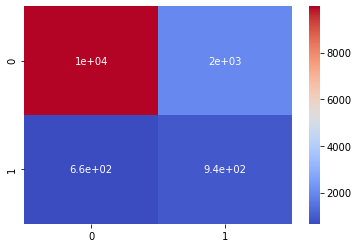

In [161]:
print(classification_report(y_test, y_pred_dtree_clf))
cm = confusion_matrix(y_test, y_pred_dtree_clf, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> After multiple iterations (we went from broad parameter ranges to granular ranges), we were able to reach the best parameters for the decision tree to maximise recall </font>

<font color = "magenta"> 

### Evaluating the performance of the optimized decision tree against the basic decision tree
</font>

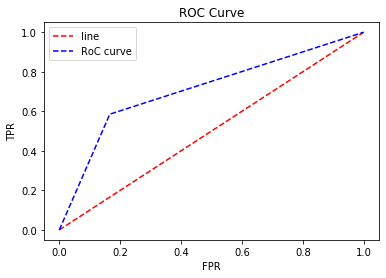

In [162]:
fpr_dtree_clf, tpr_dtree_clf, threshold_dtree_clf = roc_curve(y_test, y_pred_dtree_clf)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_dtree_clf,tpr_dtree_clf,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

<font color = "magenta"> 

### Evaluating for probabilistic output of decision tree
</font>

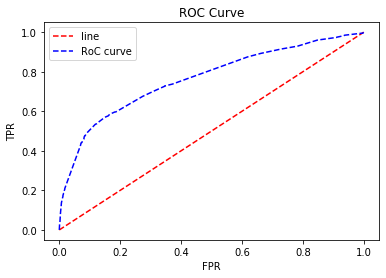

In [163]:
fpr_dtree_clf_prob, tpr_dtree_clf_prob, threshold_dtree_clf_prob = roc_curve(y_test, y_pred_dtree_clf_prob)
plt.plot([0,1],[0,1],"r--", label = "line")
plt.plot(fpr_dtree_clf_prob,tpr_dtree_clf_prob,"b--", label = "RoC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

In [164]:
print("Basic Decision Tree: \n", classification_report(y_test, y_pred_dtree))
print("Optimal Decision Tree: \n",classification_report(y_test, y_pred_dtree_clf))

Basic Decision Tree: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.64      0.17      0.27      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564

Optimal Decision Tree: 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     11967
           1       0.32      0.59      0.41      1597

    accuracy                           0.80     13564
   macro avg       0.63      0.71      0.65     13564
weighted avg       0.87      0.80      0.83     13564



Basic Decision Tree: 
 [[11819   148]
 [ 1329   268]]


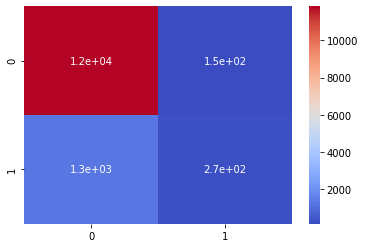

In [165]:
print("Basic Decision Tree: \n", confusion_matrix(y_test, y_pred_dtree))
cm = confusion_matrix(y_test, y_pred_dtree, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

Optimal Decision Tree: 
 [[9981 1986]
 [ 662  935]]


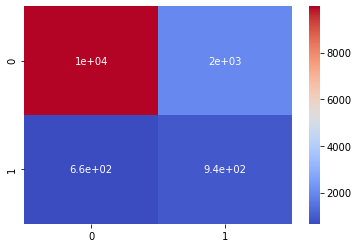

In [166]:
print("Optimal Decision Tree: \n",confusion_matrix(y_test, y_pred_dtree_clf))
cm = confusion_matrix(y_test, y_pred_dtree_clf, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> The optimal decision tree performs much better in terms of recall on the cases with Target = 1.  </font>

<font color = "magenta"> 

### Developing Bagging model through gridsearch
</font>

In [167]:
d_tree_bagger = DecisionTreeClassifier(criterion = "gini", max_depth = 13, max_features = 15, class_weight="balanced")
bag_ = BaggingClassifier(base_estimator=d_tree_bagger, n_estimators = 300)
param_grid = {
    "base_estimator__max_depth" : [ 7, 8, 9, 10, 11],
    "base_estimator__max_features" : [3, 4, 5, 6, 7]
}
clf = GridSearchCV(bag_, param_grid = param_grid, scoring = custom_scorer, cv = 3, verbose=True, n_jobs=-1)
bag_ = clf.fit(x_train, y_train)
print(bag_.score(x_train, y_train))
print(bag_.score(x_test, y_test))
print(bag_.best_params_)
y_pred_bag = bag_.predict(x_test)
print("Bagging: \n", classification_report(y_test, y_pred_bag))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.7min finished


0.8358935376910694
0.7872529229959722
{'base_estimator__max_depth': 10, 'base_estimator__max_features': 7}
Bagging: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     11967
           1       0.35      0.58      0.43      1597

    accuracy                           0.82     13564
   macro avg       0.64      0.72      0.66     13564
weighted avg       0.87      0.82      0.84     13564



<font color = "magenta"> 

### Recreating Bagging model based on chosen parameters
</font>

In [168]:
d_tree_bagger = DecisionTreeClassifier(criterion = "gini", max_depth = bag_.best_params_["base_estimator__max_depth"], max_features = bag_.best_params_["base_estimator__max_features"], class_weight="balanced")
bag_ = BaggingClassifier(base_estimator=d_tree_bagger, n_estimators = 300)
param_grid = {
    "base_estimator__max_depth" : [ 7, 8, 9, 10, 11],
    "base_estimator__max_features" : [3, 4, 5, 6, 7]
}
bag_.fit(x_train, y_train)
print(bag_.score(x_train, y_train))
print(bag_.score(x_test, y_test))
y_pred_bag = bag_.predict(x_test)
print("Bagging: \n", classification_report(y_test, y_pred_bag))

0.8290833254336903
0.8195222648186375
Bagging: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     11967
           1       0.34      0.58      0.43      1597

    accuracy                           0.82     13564
   macro avg       0.64      0.72      0.66     13564
weighted avg       0.87      0.82      0.84     13564



Bagging: 
 [[10187  1780]
 [  668   929]]


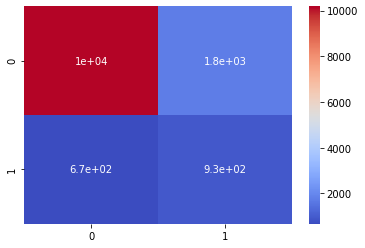

In [169]:
print("Bagging: \n", confusion_matrix(y_test, y_pred_bag))
cm = confusion_matrix(y_test, y_pred_bag, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> Bagging performs better on predicting and recalling Target "1"s  </font>

<font color = "magenta"> 

### Developing Adaptive Boosting model through gridsearch
</font>

In [170]:
d_tree_ada = DecisionTreeClassifier(criterion = "gini", max_depth = 4, max_features = 5, class_weight="balanced")
ada_ = AdaBoostClassifier(base_estimator=d_tree_ada, n_estimators = 300)
param_grid = {
    "base_estimator__max_depth" : [1, 2, 3],
    "base_estimator__max_features" : [16, 19, 22]
}
clf = GridSearchCV(ada_, param_grid = param_grid, scoring = custom_scorer_ada, cv = 3, verbose=True, n_jobs=-1)
ada_ = clf.fit(x_train, y_train)
print(ada_.score(x_train, y_train))
print(ada_.score(x_test, y_test))
print(ada_.best_params_)
y_pred_ada = ada_.predict(x_test)
print("Adaptive Boosting: \n", classification_report(y_test, y_pred_ada))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.9min finished


-0.20816140047084652
-0.22004331050442993
{'base_estimator__max_depth': 1, 'base_estimator__max_features': 19}
Adaptive Boosting: 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86     11967
           1       0.29      0.65      0.40      1597

    accuracy                           0.77     13564
   macro avg       0.62      0.72      0.63     13564
weighted avg       0.87      0.77      0.81     13564



### OBSERVATIONS

<font color = "purple"> The scoring on the test and train sets is negative as we have added a performance penalty to this scorer (custom_scorer_ada). This was done specifically to ensure that the adaptive boosting algorithm tried to improved recall. This was a problem faced in the earlier iterations of the ada boost algorithm for this assignment </font>

<font color = "magenta"> 

### Recreating Adaboost based on chosen parameters
</font>

In [171]:
d_tree_ada = DecisionTreeClassifier(criterion = "gini", max_depth = ada_.best_params_["base_estimator__max_depth"], max_features = ada_.best_params_["base_estimator__max_features"], class_weight="balanced")
ada_ = AdaBoostClassifier(base_estimator=d_tree_ada, n_estimators = 300)
param_grid = {
    "base_estimator__max_depth" : [1, 2, 3],
    "base_estimator__max_features" : [16, 19, 22]
}
clf = GridSearchCV(ada_, param_grid = param_grid, scoring = custom_scorer, cv = 3, verbose=True, n_jobs=-1)
ada_.fit(x_train, y_train)
print(ada_.score(x_train, y_train))
print(ada_.score(x_test, y_test))
y_pred_ada = ada_.predict(x_test)
print("Adaptive Boosting: \n", classification_report(y_test, y_pred_ada))

0.7729010648718678
0.7734444116779711
Adaptive Boosting: 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86     11967
           1       0.29      0.66      0.41      1597

    accuracy                           0.77     13564
   macro avg       0.62      0.72      0.63     13564
weighted avg       0.87      0.77      0.81     13564



Adaptive Boosting: 
 [[9441 2526]
 [ 547 1050]]


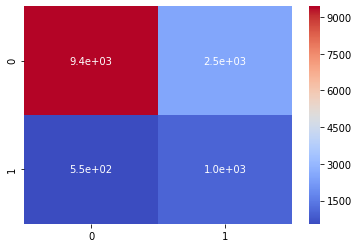

In [172]:
print("Adaptive Boosting: \n", confusion_matrix(y_test, y_pred_ada))
cm = confusion_matrix(y_test, y_pred_ada, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> Through our custom scorer, we were able to bring up the Ada boost to a higher degree of recall for target cases = 1  </font>

<font color = "magenta"> 

### Developing Gradient Boosting model through Gridsearch
</font>

In [173]:
grb_ = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.03, max_depth = 5, max_features = 15)
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7],
    'max_features' : [5, 7, 9],
    'learning_rate' : [0.03]
}
clf = GridSearchCV(grb_, param_grid = param_grid, scoring = custom_scorer, cv = 3, verbose=True, n_jobs=-1)
grb_ = clf.fit(x_train, y_train)
print(grb_.score(x_train, y_train))
print(grb_.score(x_test, y_test))
print(grb_.best_params_)
y_pred_grb = grb_.predict(x_test)
print("Gradient Boosting: \n", classification_report(y_test, y_pred_grb))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.7min finished


0.8164728302121522
0.7930278313368443
{'learning_rate': 0.03, 'max_depth': 5, 'max_features': 5}
Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.65      0.22      0.33      1597

    accuracy                           0.89     13564
   macro avg       0.78      0.60      0.64     13564
weighted avg       0.87      0.89      0.87     13564



<font color = "magenta"> 

### Recreating Gradient boosting model with chosen parameters
</font>

In [174]:
grb_ = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.03, max_depth = grb_.best_params_["max_depth"], max_features = grb_.best_params_["max_features"])
grb_.fit(x_train, y_train)
print(grb_.score(x_train, y_train))
print(grb_.score(x_test, y_test))
y_pred_grb = grb_.predict(x_test)
print("Gradient Boosting: \n", classification_report(y_test, y_pred_grb))

0.9011596675830252
0.8942789737540549
Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.65      0.22      0.33      1597

    accuracy                           0.89     13564
   macro avg       0.78      0.60      0.64     13564
weighted avg       0.87      0.89      0.87     13564



Gradient Boosting: 
 [[11777   190]
 [ 1244   353]]


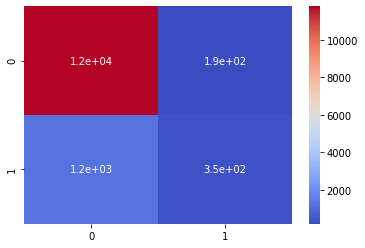

In [175]:
print("Gradient Boosting: \n", confusion_matrix(y_test, y_pred_grb))
cm = confusion_matrix(y_test, y_pred_grb, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> Gradient boosting performs better than other algorithms overall, but continues to face the recall issues that are prevalent. Primarily due to lack of sufficient 1s in the target column. We could use oversampling algorithms such as SMOTE on the training set, however, since the libraries may not be installed at your machines, this has not been attempted </font>

<font color = "magenta"> 

### Developing Random Forest model through GridSearch
</font>

In [176]:
random_forest = RandomForestClassifier(max_depth = 15, max_features = 25, class_weight="balanced", n_estimators = 300)
param_grid = {
    'max_depth' : [ 9, 10, 12],
    'max_features' : [3, 4, 5, 6, 7]
}
clf = GridSearchCV(random_forest, param_grid = param_grid, scoring = custom_scorer, cv = 3, verbose=True, n_jobs=-1)
random_forest = clf.fit(x_train, y_train)
print(random_forest.score(x_train, y_train))
print(random_forest.score(x_test, y_test))
print(random_forest.best_params_)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest: \n", classification_report(y_test, y_pred_random_forest))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.7min finished


0.8319450922615339
0.7855538495839556
{'max_depth': 10, 'max_features': 5}
Random Forest: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     11967
           1       0.34      0.58      0.43      1597

    accuracy                           0.82     13564
   macro avg       0.64      0.71      0.66     13564
weighted avg       0.87      0.82      0.84     13564



<font color = "magenta"> 

### Recreating Random forest based on chosen parameters
</font>

In [177]:
random_forest = RandomForestClassifier(max_depth = random_forest.best_params_["max_depth"], max_features = random_forest.best_params_["max_features"], class_weight="balanced", n_estimators = 300)
random_forest.fit(x_train, y_train)
print(random_forest.score(x_train, y_train))
print(random_forest.score(x_test, y_test))
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest: \n", classification_report(y_test, y_pred_random_forest))

0.8295889025816033
0.8197434385137128
Random Forest: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     11967
           1       0.34      0.57      0.43      1597

    accuracy                           0.82     13564
   macro avg       0.64      0.71      0.66     13564
weighted avg       0.87      0.82      0.84     13564



Random forest: 
 [[10201  1766]
 [  679   918]]


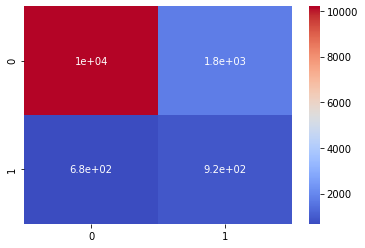

In [178]:
print("Random forest: \n", confusion_matrix(y_test, y_pred_random_forest))
cm = confusion_matrix(y_test, y_pred_random_forest, labels = [0, 1])
plt.figure (figsize = (6,4))
sns.heatmap (cm, annot = True, cmap = "coolwarm")

### OBSERVATIONS

<font color = "purple"> The random forest performs significantly better in recall for Target "1"s, and has an overall accuracy score of around 79% on the test data. This may be improved further through oversampling the minority class in the test data</font>

## <font color = "blue">Q7. Compare performances of all the models (5 marks)</font>

<font color = "magenta"> 

### Determine FPR, TPR for all ensemble candidates and plotting them against the standard classfication techniques
</font>

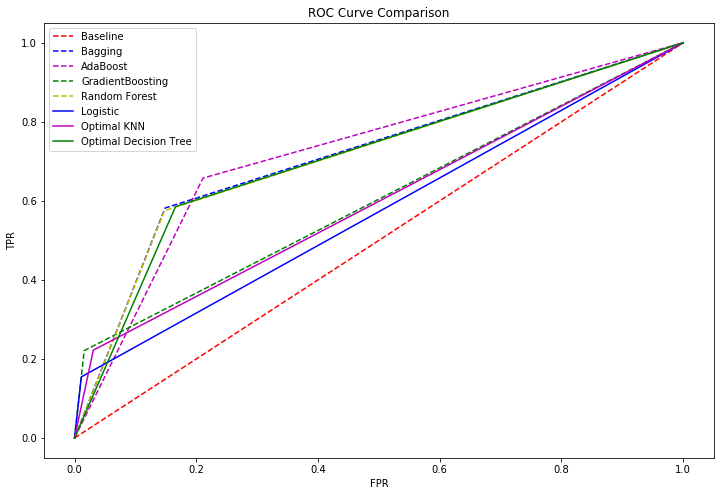

In [179]:
fpr_bag, tpr_bag, threshold_bag = roc_curve(y_test, y_pred_bag)
fpr_ada, tpr_ada, threshold_ada = roc_curve(y_test, y_pred_ada)
fpr_grb, tpr_grb, threshold_grb = roc_curve(y_test, y_pred_grb)
fpr_random, tpr_random, threshold_random = roc_curve(y_test, y_pred_random_forest)
plt.figure(figsize = (12,8))
plt.plot([0,1],[0,1],"r--", label = "Baseline")
plt.plot(fpr_bag,tpr_bag,"b--", label = "Bagging")
plt.plot(fpr_ada,tpr_ada,"m--", label = "AdaBoost")
plt.plot(fpr_grb,tpr_grb,"g--", label = "GradientBoosting")
plt.plot(fpr_random,tpr_random,"y--", label = "Random Forest")

plt.plot(fpr_logistic,tpr_logistic,"b-", label = "Logistic")
plt.plot(fpr_knn,tpr_knn,"m-", label = "Optimal KNN")
plt.plot(fpr_dtree_clf,tpr_dtree_clf,"g-", label = "Optimal Decision Tree")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend()

### OBSERVATIONS

<font color = "purple"> Bagging, random forests, ada boost and decision trees perform much better in this graph, primarily due to the fact that these are predictions from their optimized versions and they are able to produce better recall on Target = 1 cases </font>

<font color = "magenta"> 

### Comparing probability ROC curves
</font>

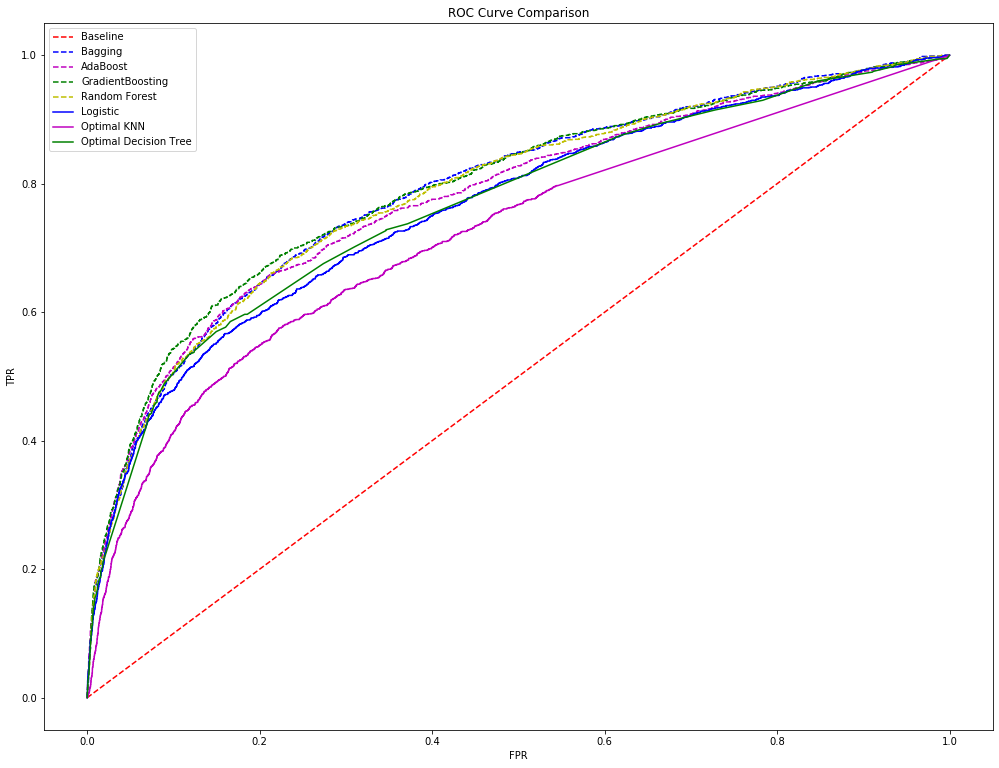

In [180]:
y_pred_bag_prob = bag_.predict_proba(x_test)
y_pred_ada_prob = ada_.predict_proba(x_test)
y_pred_grb_prob = grb_.predict_proba(x_test)
y_pred_random_forest_prob = random_forest.predict_proba(x_test)
y_pred_bag_prob = y_pred_bag_prob[:,1]
y_pred_ada_prob = y_pred_ada_prob[:,1]
y_pred_grb_prob = y_pred_grb_prob[:,1]
y_pred_random_forest_prob = y_pred_random_forest_prob[:,1]
fpr_bag_prob, tpr_bag_prob, threshold_bag_prob = roc_curve(y_test, y_pred_bag_prob)
fpr_ada_prob, tpr_ada_prob, threshold_ada_prob = roc_curve(y_test, y_pred_ada_prob)
fpr_grb_prob, tpr_grb_prob, threshold_grb_prob = roc_curve(y_test, y_pred_grb_prob)
fpr_random_prob, tpr_random_prob, threshold_random_prob = roc_curve(y_test, y_pred_random_forest_prob)
plt.figure(figsize = (17,13))
plt.plot([0,1],[0,1],"r--", label = "Baseline")
plt.plot(fpr_bag_prob,tpr_bag_prob,"b--", label = "Bagging")
plt.plot(fpr_ada_prob,tpr_ada_prob,"m--", label = "AdaBoost")
plt.plot(fpr_grb_prob,tpr_grb_prob,"g--", label = "GradientBoosting")
plt.plot(fpr_random_prob,tpr_random_prob,"y--", label = "Random Forest")

plt.plot(fpr_logistic_prob,tpr_logistic_prob,"b-", label = "Logistic")
plt.plot(fpr_knn_prob,tpr_knn_prob,"m-", label = "Optimal KNN")
plt.plot(fpr_dtree_clf_prob,tpr_dtree_clf_prob,"g-", label = "Optimal Decision Tree")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend()

<font color = "magenta"> 

### Comparing AUC for all models

</font>

In [182]:
print("Gradient Boosting: ", auc(fpr_grb_prob,tpr_grb_prob))
print("Bagging: ", auc(fpr_bag_prob,tpr_bag_prob))
print("Random Forest: ", auc(fpr_random_prob,tpr_random_prob))
print("AdaBoost: ", auc(fpr_ada_prob,tpr_ada_prob))
print("Optimal Decision Tree: ", auc(fpr_dtree_clf_prob,tpr_dtree_clf_prob))
print("Logistic Regression: ", auc(fpr_logistic_prob,tpr_logistic_prob))
print("KNN: ", auc(fpr_knn_prob,tpr_knn_prob))

Gradient Boosting:  0.7922072434741353
Bagging:  0.7876226780816941
Random Forest:  0.7850215728402344
AdaBoost:  0.7781921835873113
Optimal Decision Tree:  0.7646905634201003
Logistic Regression:  0.7615358328075972
KNN:  0.7185903480448922


### OBSERVATIONS

<font color = "purple"> Gradient boosting offers the strongest performance scores (AUC based). Random forest and Bagging perform quite closely to gradient boosting. Ada boost is a bit further behind. The optimal decision tree is just a bit lower than these options followed by logistic regression and KNN. It does seem that we need to tune the Ada boost a bit more to reach its complete potential 

To ensure higher recall for Ada boost, we have used our custom scorer to add a classficiation penalty for the Target = 1 cases. This will create a pseudo weightage on getting the target 1s right and trigger better recall candidates on target 1s to survive
</font>

## ASSIGNMENT END